# Computing Basic Statistics
Computing basic statistics on a dataset is an essential first step to understanding the data.  This notebook shows how you can compute basic statistics on a dataset.

In [1]:
import pandas as pd
import koleksyon.dta as dd
import koleksyon.lib as ll

In [5]:
!pwd

/Users/m169223/projects/poc/koleksyon/notebooks/DataPrep


In [7]:
#load an example dataset we have in the package
df = dd.load_parquet("../../data/melbourne/", "melbourne_")
df = df.fillna(-1)  #note, not the best way to impute missing data, that will be covered later
df

Number of Records Loaded: 34857


Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h       -1.0     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u       -1.0     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
0             Jellis   3/09/2016       2.5    3067.0  ...       1.0  1.0   
1             Biggin   3/12/2016       2.5    3067.0  ...       1.0  1.0   
2             Biggin   4/02/2016       2.5    3067.0  ...       1.0  0.0   
3             Rounds   4/02/2016       2.5    3067.0  ...       2.0  1.0   
4             Biggin   4/03/2017       2.5    3067.0  ...       2.0  0.0   
...              ...         ...       ...       ...  ...       ...  ...   
34852            Jas  24/02/2018       6.3    3013.0  ...       1.0  3.0   
34853        Sweeney  24/02/2018       6.3    3013.0  ...       2.0  1.0   
34854            Jas  24/02/2018       6.3    3013.0  ...       1.0  2.0   
34855  hockingstuart  24/02/2018       6.3    3013.0  ...      -1.0 -1.0   
34856             RW  24/02/2018       6.3    3013.0  ...       1.0  0.0   

       Landsize  BuildingArea  YearBuilt               CouncilArea Lattitude  \
0         126.0          -1.0       -1.0        Yarra City Council -37.80140   
1         202.0          -1.0       -1.0        Yarra City Council -37.79960   
2         156.0          79.0     1900.0        Yarra City Council -37.80790   
3           0.0          -1.0       -1.0        Yarra City Council -37.81140   
4         134.0         150.0     1900.0        Yarra City Council -37.80930   
...         ...           ...        ...                       ...       ...   
34852     593.0          -1.0       -1.0  Maribyrnong City Council -37.81053   
34853      98.0         104.0     2018.0  Maribyrnong City Council -37.81551   
34854     220.0         120.0     2000.0  Maribyrnong City Council -37.82286   
34855      -1.0          -1.0       -1.0  Maribyrnong City Council  -1.00000   
34856     250.0         103.0     1930.0  Maribyrnong City Council -37.81810   

       Longtitude             Regionname Propertycount  
0       144.99580  Northern Metropolitan        4019.0  
1       144.99840  Northern Metropolitan        4019.0  
2       144.99340  Northern Metropolitan        4019.0  
3       145.01160  Northern Metropolitan        4019.0  
4       144.99440  Northern Metropolitan        4019.0  
...           ...                    ...           ...  
34852   144.88467   Western Metropolitan        6543.0  
34853   144.88826   Western Metropolitan        6543.0  
34854   144.87856   Western Metropolitan        6543.0  
34855    -1.00000   Western Metropolitan        6543.0  
34856   144.89351   Western Metropolitan        6543.0  

[34857 rows x 21 columns]

The prefered method for looking at a single variable is to do a density plot as shown below:

Statistics for  Variable:	Landsize
Number of Data Points:	34857
Min:	-1.0
Max:	433014.0
Mean:	392.14120549674385
Mode:	-1.0
Variance:	2777.9466209889188
Excess kurtosis of normal distribution (should be 0):	17188.018934591004
Skewness of normal distribution (should be 0):	116.48289709109525



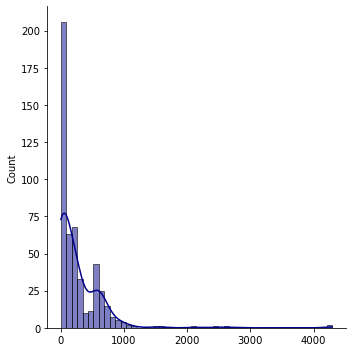

In [8]:
ll.var_analysis(df, "Landsize")

In [9]:
# If we just want the statistics, not the plot, do this:
dreport = ll.dist_report(df, "Landsize")
print(dreport)

Statistics for  Variable:	Landsize
Number of Data Points:	34857
Min:	-1.0
Max:	433014.0
Mean:	392.14120549674385
Mode:	-1.0
Variance:	2777.9466209889188
Excess kurtosis of normal distribution (should be 0):	17188.018934591004
Skewness of normal distribution (should be 0):	116.48289709109525



In [10]:
#each element can be accessed in the object returned as follows:
print("number = ", dreport.number)
print("min = ", dreport.min)
print("max = ", dreport.max)
print("mean = ", dreport.mean)
print("mode = ", dreport.mode)
print("variance = ", dreport.variance)
print("kurtosis = ", dreport.kurtosis)
print("skew = ", dreport.skew)

number =  34857
min =  -1.0
max =  433014.0
mean =  392.14120549674385
mode =  -1.0
variance =  2777.9466209889188
kurtosis =  17188.018934591004
skew =  116.48289709109525


# Table Statistics
To calculate simple statistics for all numeric data in the dataframe, we can use the calculate_summary_stats function like so:

In [11]:
statsdf = ll.calculate_summary_stats(df)
statsdf

column name  number       min           max           mean     mode  \
0           Rooms   34857   1.00000  1.600000e+01       3.031012      3.0   
1           Price   34857  -1.00000  1.120000e+07  820898.686634     -1.0   
2        Distance   34857  -1.00000  4.810000e+01      11.184580     11.2   
3        Postcode   34857  -1.00000  3.978000e+03    3115.973434   3073.0   
4        Bedroom2   34857  -1.00000  3.000000e+01       2.121755      3.0   
5        Bathroom   34857  -1.00000  1.200000e+01       1.005365      1.0   
6             Car   34857  -1.00000  2.600000e+01       1.045558      2.0   
7        Landsize   34857  -1.00000  4.330140e+05     392.141205     -1.0   
8    BuildingArea   34857  -1.00000  4.451500e+04      62.573614     -1.0   
9       YearBuilt   34857  -1.00000  2.106000e+03     876.234817     -1.0   
10      Lattitude   34857 -38.19043 -1.000000e+00     -29.387603     -1.0   
11     Longtitude   34857  -1.00000  1.455264e+02     111.593619     -1.0   
12  Propertycount   34857  -1.00000  2.165000e+04    7572.236452  21650.0   

         variance      kurtosis        skew  
0        0.969919      2.511176    0.499075  
1   714034.456632      7.858376    1.768967  
2        6.789011      3.584817    1.503323  
3      110.291716     39.926499    3.236154  
4        1.934146      0.723203   -0.463342  
5        1.281750     -0.229276   -0.277064  
6        1.470889      3.363949    0.404559  
7     2777.946621  17188.018935  116.482897  
8      263.977220  23091.479720  138.263342  
9      977.741595     -1.949663    0.218647  
10      15.463375     -0.333142    1.291011  
11      61.331598     -0.333060   -1.291094  
12    4428.393654      0.890084    0.991737

# Group-by Semantics
Many times, we want the statistics for a given variable, A, grouped by another variable, B.  Most often, we assume that B is a categorical variable and not continuous. For example, if we wanted to look at the distribution of price by selling agent.  

In [42]:
def build_groupby_df(df, category, numeric):  # numeric variable, categorical variable
    '''
    Description: TBD
    @input:
        df: input dataframe
        category: list of categorical fields
        numeric: numerica field for calculating aggregation
    @return:
        df_copy: dataframe with grouping metric and following additional columns 
            - category1_category2_..
            - category1_category2_.._count 
            - category1_category2_.._sum
            - category1_category2_.._groupby
    '''
    # sanity checks
    if (not(isinstance(category, list))):
        raise ValueError(f"Invalid category={category}! category should be a list of values..")

    if (not(isinstance(df, pd.DataFrame))):
        raise ValueError(f"Invalid value! df should be a Pandas dataframe ...")

    if (numeric not in df.columns):
        raise ValueError(f"{numeric} column is not present in input dataframe ...")

    for cat in category:
        if (cat not in df.columns):
            raise ValueError(f"{cat} column is not present in input dataframe ...")
    
    concat_category = "_".join(category)
    groupby_col = f"{concat_category}_groupby"
    count_col = f"{concat_category}_count"
    sum_col = f"{concat_category}_sum"
    df_copy = df.copy()  
    # for multiple categorical fields add a column with concated value from each column
    df_copy[concat_category] = df_copy[category].apply(list, axis=1).apply(lambda x: "_".join([str(y) for y in x])) 
    df_copy[concat_category].fillna("-1", inplace=True)
    df_copy[concat_category] = df_copy[concat_category].astype("object")
    # commented filling -1 for NA in numeric field as this might impact descriptive stats and aggregations (sum, avg etc.)
    # df_copy[numeric].fillna(-1, inplace=True)
    df_copy[count_col] = df_copy.groupby(by=[concat_category])[concat_category].transform("count")
    df_copy[sum_col] = df_copy.groupby(by=[concat_category])[numeric].transform("sum")
    df_copy[groupby_col] = df_copy[concat_category].apply(str) + "_(" + df_copy[count_col].apply(str) + "|" + df_copy[sum_col].apply(str) + ")"
    return df_copy
    
statsdf_groupby = build_groupby_df(df, ["SellerG", "Method"], "Price")
statsdf_groupby

Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h       -1.0     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u       -1.0     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  ...  YearBuilt  \
0             Jellis   3/09/2016       2.5    3067.0  ...       -1.0   
1             Biggin   3/12/2016       2.5    3067.0  ...       -1.0   
2             Biggin   4/02/2016       2.5    3067.0  ...     1900.0   
3             Rounds   4/02/2016       2.5    3067.0  ...       -1.0   
4             Biggin   4/03/2017       2.5    3067.0  ...     1900.0   
...              ...         ...       ...       ...  ...        ...   
34852            Jas  24/02/2018       6.3    3013.0  ...       -1.0   
34853        Sweeney  24/02/2018       6.3    3013.0  ...     2018.0   
34854            Jas  24/02/2018       6.3    3013.0  ...     2000.0   
34855  hockingstuart  24/02/2018       6.3    3013.0  ...       -1.0   
34856             RW  24/02/2018       6.3    3013.0  ...     1930.0   

                    CouncilArea  Lattitude  Longtitude             Regionname  \
0            Yarra City Council  -37.80140   144.99580  Northern Metropolitan   
1            Yarra City Council  -37.79960   144.99840  Northern Metropolitan   
2            Yarra City Council  -37.80790   144.99340  Northern Metropolitan   
3            Yarra City Council  -37.81140   145.01160  Northern Metropolitan   
4            Yarra City Council  -37.80930   144.99440  Northern Metropolitan   
...                         ...        ...         ...                    ...   
34852  Maribyrnong City Council  -37.81053   144.88467   Western Metropolitan   
34853  Maribyrnong City Council  -37.81551   144.88826   Western Metropolitan   
34854  Maribyrnong City Council  -37.82286   144.87856   Western Metropolitan   
34855  Maribyrnong City Council   -1.00000    -1.00000   Western Metropolitan   
34856  Maribyrnong City Council  -37.81810   144.89351   Western Metropolitan   

       Propertycount    SellerG_Method  SellerG_Method_count  \
0             4019.0         Jellis_SS                     1   
1             4019.0          Biggin_S                   421   
2             4019.0          Biggin_S                   421   
3             4019.0         Rounds_VB                     3   
4             4019.0         Biggin_SP                   198   
...              ...               ...                   ...   
34852         6543.0            Jas_PI                    48   
34853         6543.0        Sweeney_SP                    97   
34854         6543.0             Jas_S                   231   
34855         6543.0  hockingstuart_SP                   334   
34856         6543.0             RW_PI                    21   

       SellerG_Method_sum              SellerG_Method_groupby  
0                    -1.0                  Jellis_SS_(1|-1.0)  
1             415650720.0          Biggin_S_(421|415650720.0)  
2             415650720.0          Biggin_S_(421|415650720.0)  
3               1614999.0             Rounds_VB_(3|1614999.0)  
4             120805238.0         Biggin_SP_(198|120805238.0)  
...                   ...                                 ...  
34852          38676497.0              Jas_PI_(48|38676497.0)  
34853          67822031.0          Swee

In [22]:
def getGroupings(listVals, groupSize):
    '''
    Description: Get the groupings of size groupSize needed for boxplot from listVals
    @input:
        listVals: sorted list of values which will be used to create the groupings
        groupSize: size of each group used in boxplot (i.e. 20 MS DRGs)
    @return:
        groupOfN: a dictionary with starting index of each group as key and all elements of the group as value
                    i.e groupOfN.get(0) = ["470.0(1114|2009)", "871.0(632|4126)", ...]
    '''
    groupOfN={}
    currList=[]
    endIndex = 0
    for ix, val in enumerate(listVals):
        if (ix!=0) and (ix%groupSize==0):
            groupOfN[ix-groupSize] = currList
            endIndex = ix-1
            currList=[]
        currList.append(val)

    groupOfN[endIndex+1] = currList
    return groupOfN

In [29]:
def plotAGroup(df_main, byCol, valCol, filterList, title, figSize=(15,9)):
    '''
    Description: creates a boxplot for a group and returns reference to figure 
    @input:
        df_main: source dataframe to plot the data
        byCol: column by which boxplots would be created (i.e. MS DRG)
        valCol: column with distribution values (i.e. Length of Stay, Count of cases etc)
        filterList: a list of values for which plot would be created. This is used to filter the main dataframe
                    before plotting
        title: title of the boxplot
        figSize: dimensions of the figure
    '''
    import matplotlib.pyplot as plt 
    import matplotlib
    params = {'axes.titlesize':'9'}
    matplotlib.rcParams.update(params)
    fig1, ax1 = plt.subplots(1,1,figsize=figSize)

    df_temp = df_main[df_main[byCol].isin(filterList)]
    axes=df_temp.boxplot(column=[valCol], by=[byCol], showmeans=True, ax=ax1, fontsize=8, return_type='axes')
    _=ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    _=ax1.set_title(f"{title}")
    
    return fig1

In [32]:
def saveToPDF(pdfFile, figs):
    '''
    Description: saves all figures in figs to a PDF file named pdfFile
    
    @input: 
        pdfFile: full path of PDF file including name
        figs: list of figures to save
    '''
    import matplotlib.backends.backend_pdf
    pdf = matplotlib.backends.backend_pdf.PdfPages(pdfFile)
    for fig in figs: 
        pdf.savefig( fig )
    pdf.close()

Get grouping for plotting

In [30]:
groupSize = 20
sellerG_Method_val_counts = statsdf_groupby["SellerG_Method_groupby"].value_counts()
sellerG_Method_val_counts_groups = getGroupings(sellerG_Method_val_counts.index, groupSize=groupSize)
sellerG_Method_val_counts_groups.keys()

dict_keys([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 960, 980, 1000, 1020, 1040, 1060, 1080, 1100, 1120, 1140, 1160, 1180, 1200, 1220])

Plot data for a single group

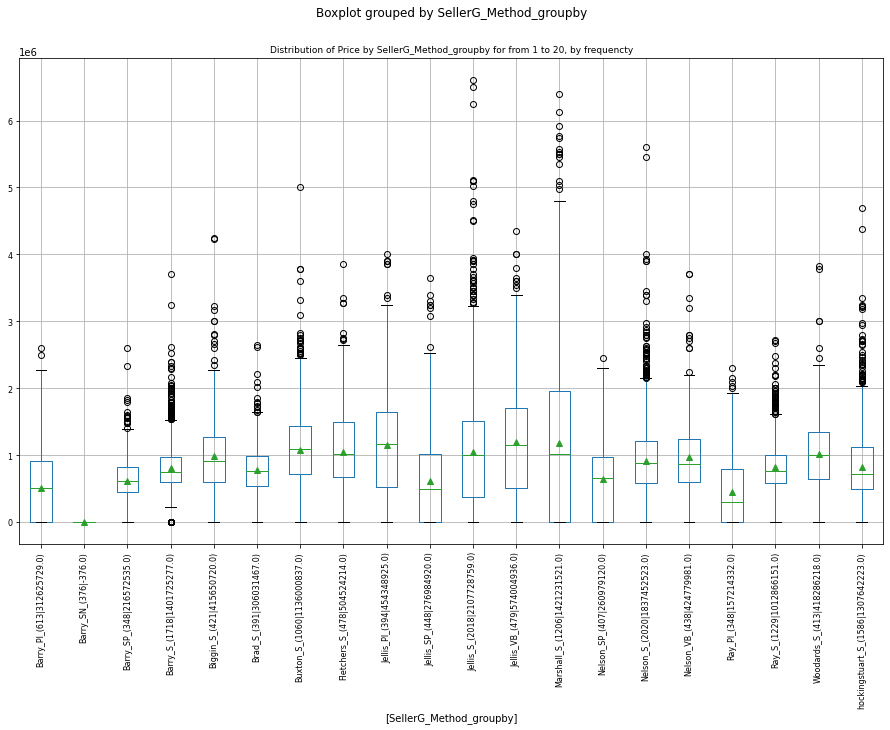

In [33]:
# get top 20 groups by frequency of occurrence
filterList = sellerG_Method_val_counts_groups.get(0) 
startIndex = 1
endIndex = groupSize
valCol = "Price"
byCol = "SellerG_Method_groupby"
title = f"Distribution of {valCol} by {byCol} for from {startIndex} to {endIndex}, by frequencty"
fig = plotAGroup(statsdf_groupby, byCol=byCol, valCol=valCol, filterList=filterList, title=title)

Saving the boxplot analysis for all groups in a PDF file

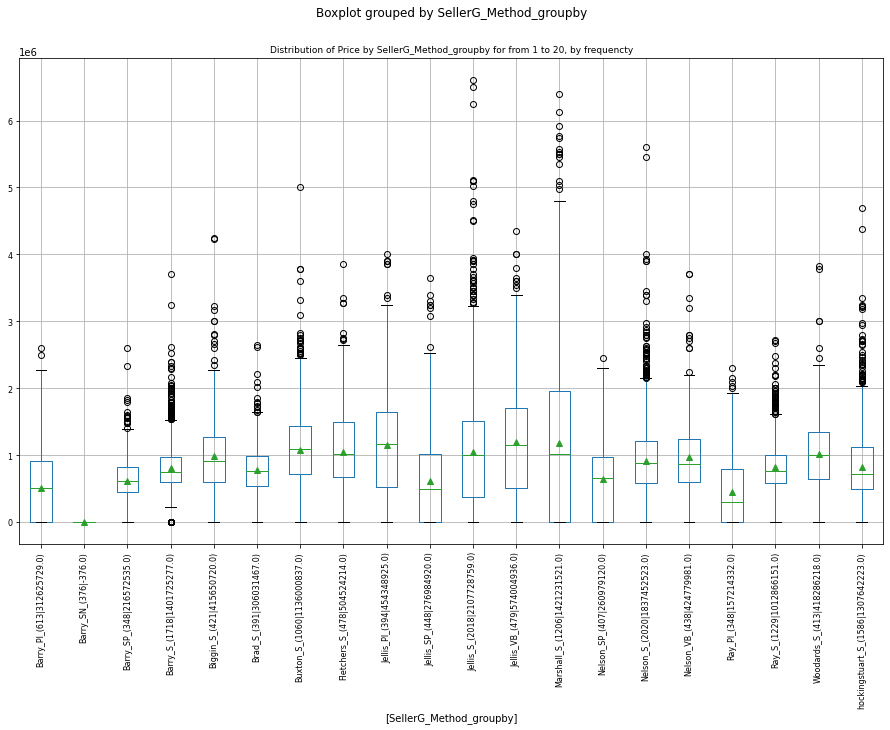

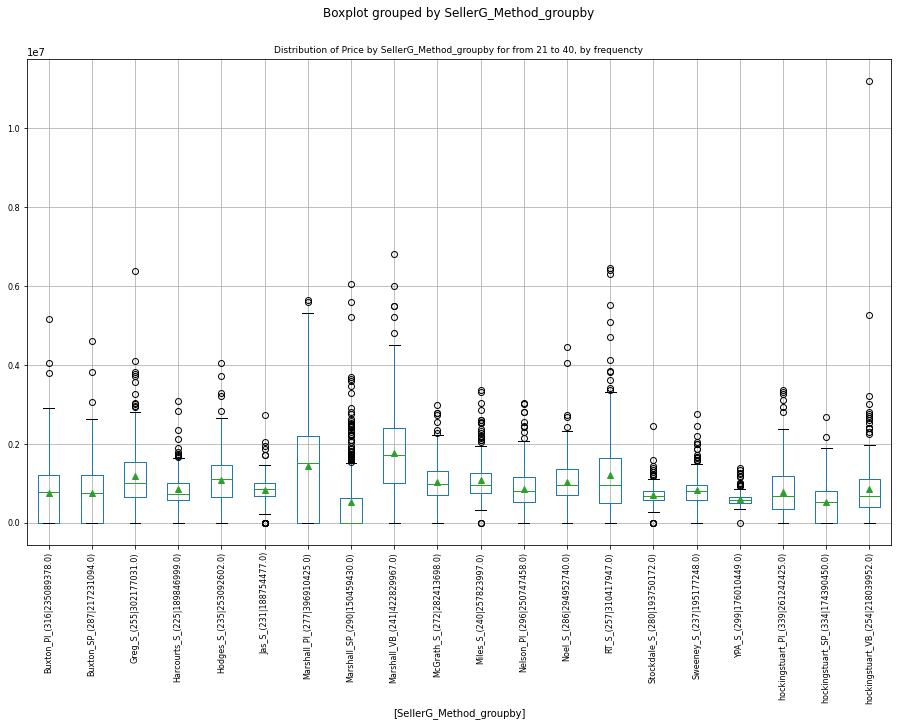

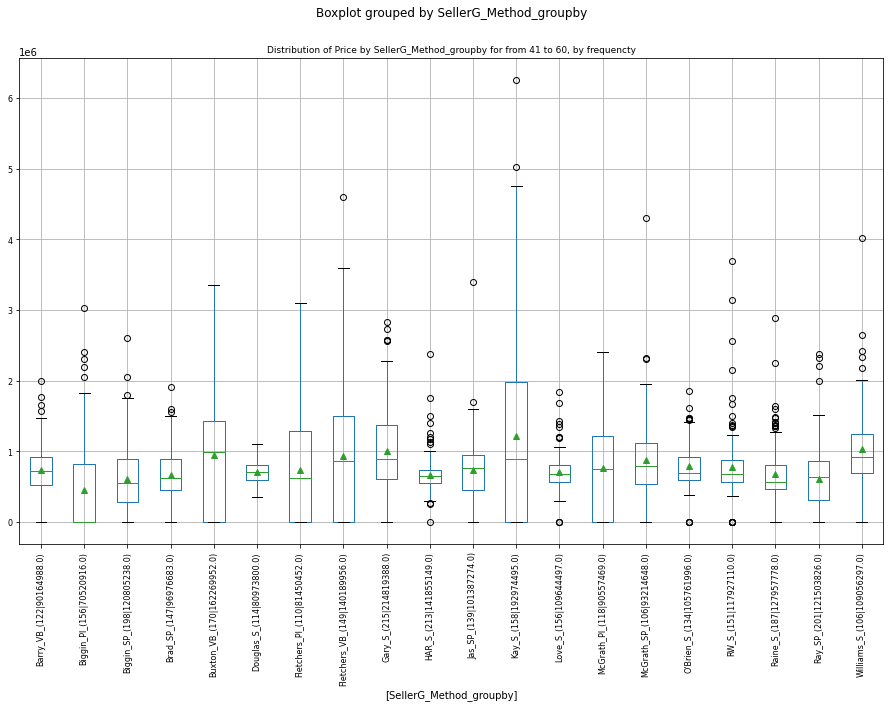

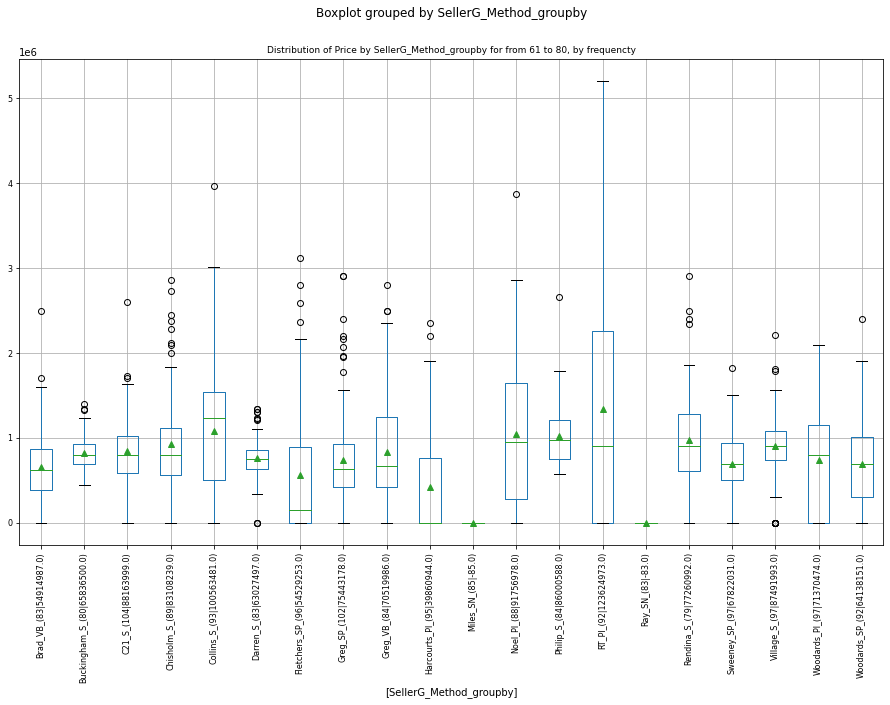

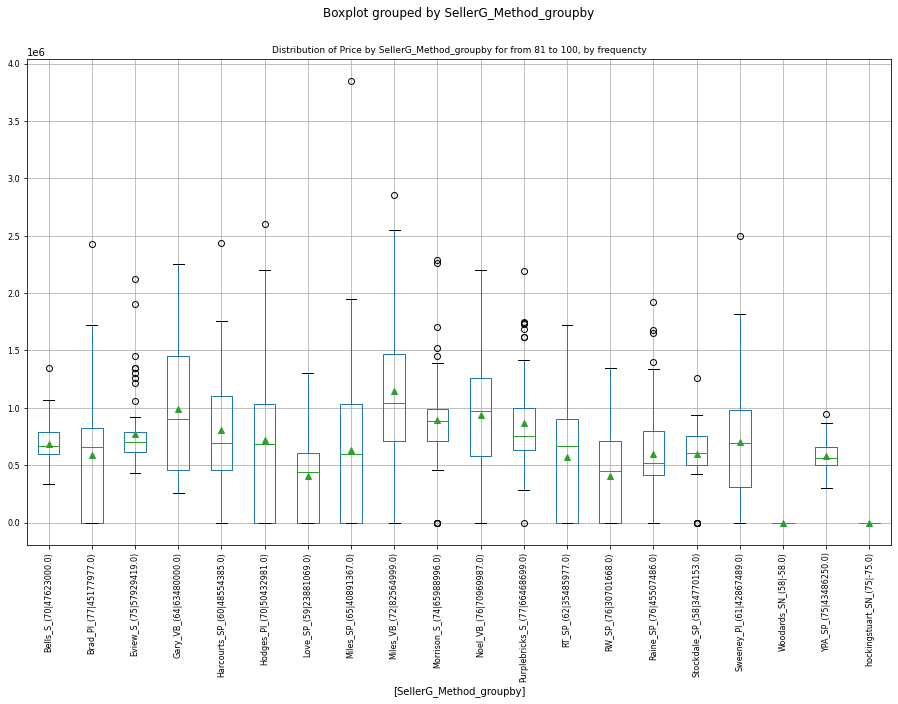

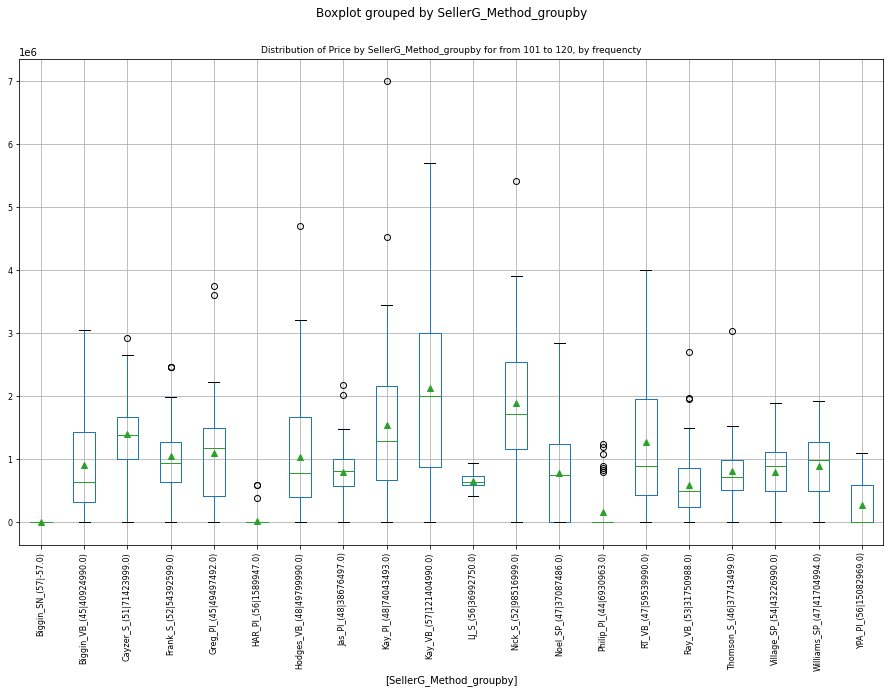

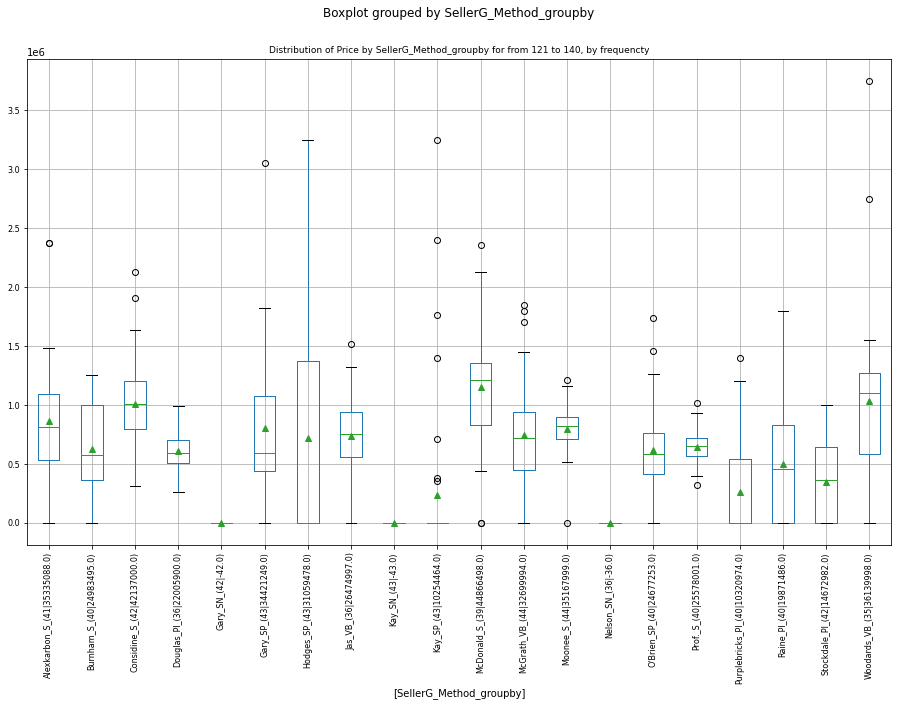

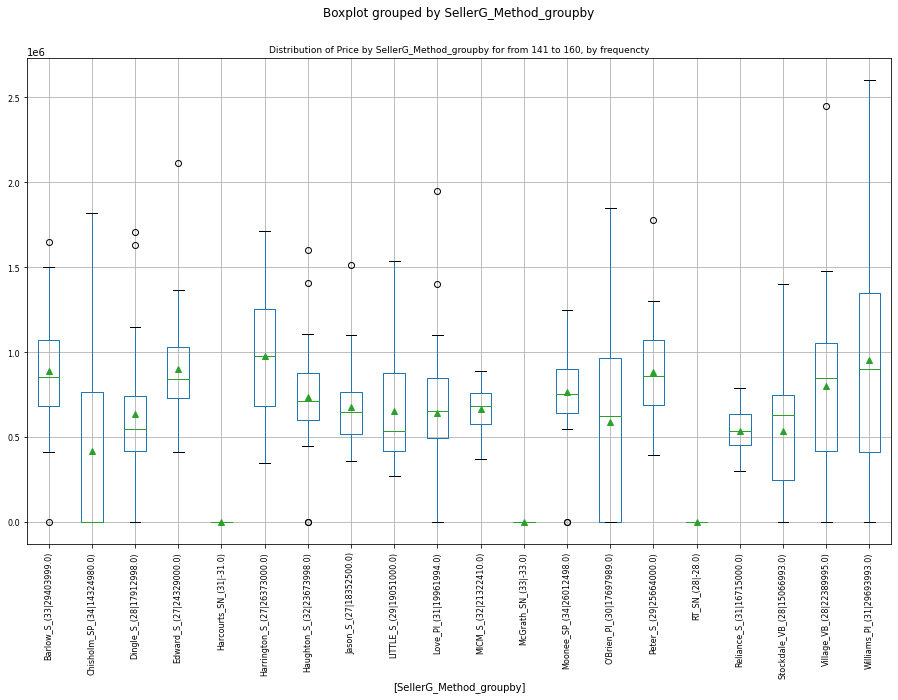

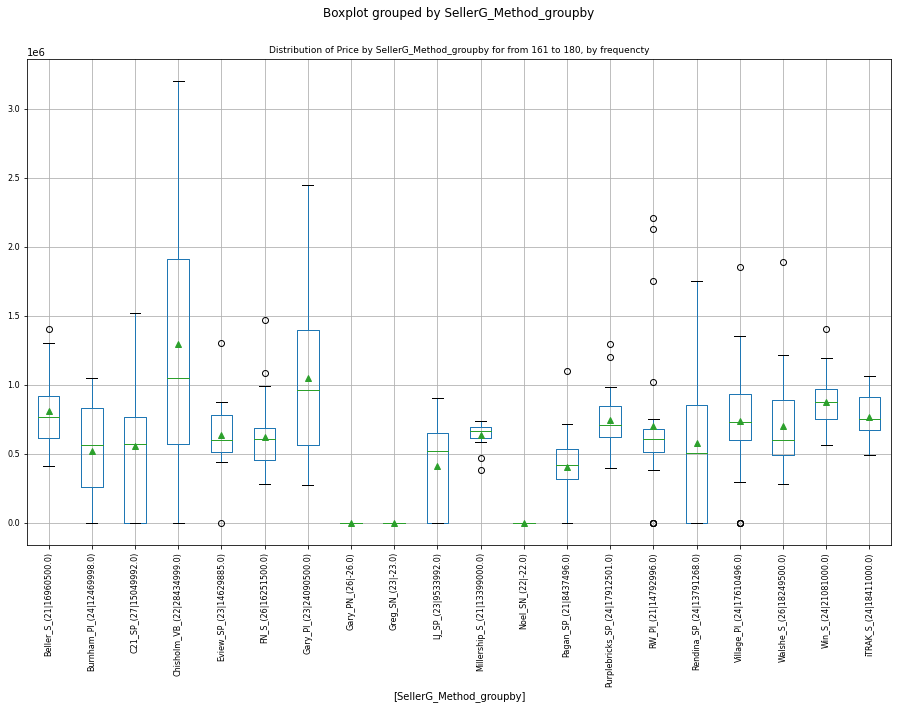

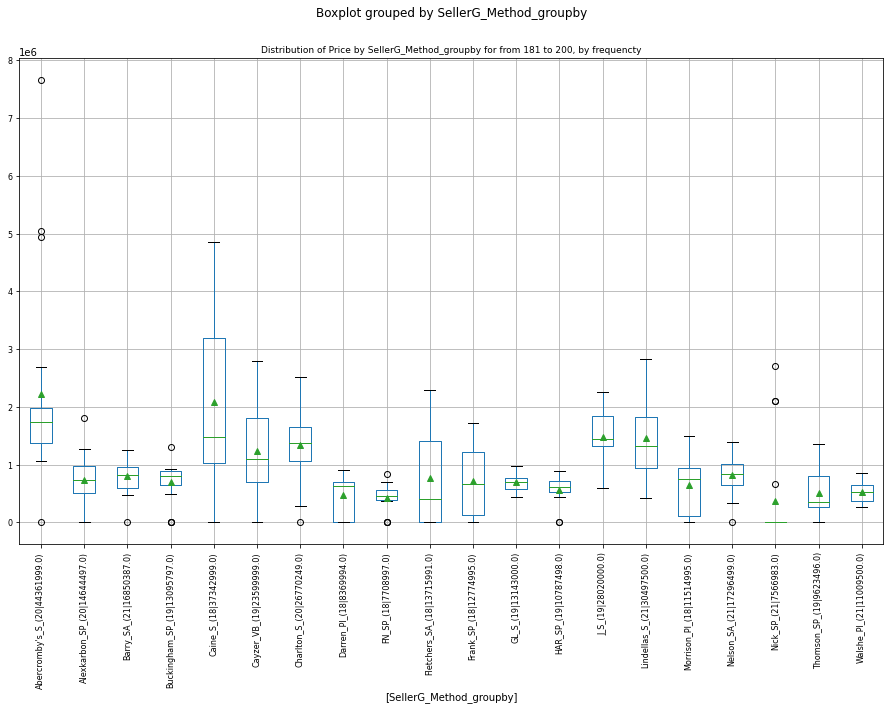

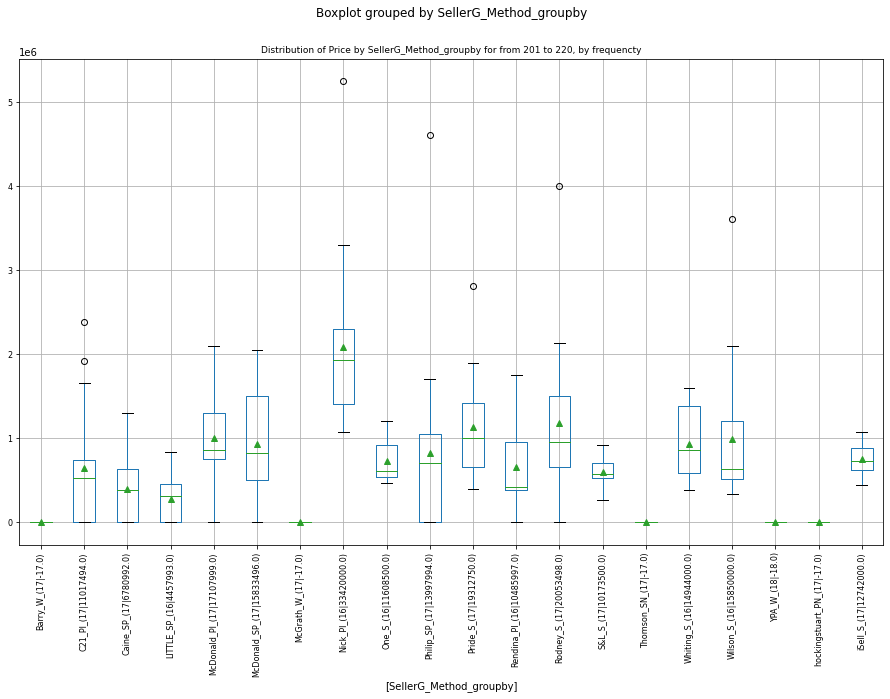

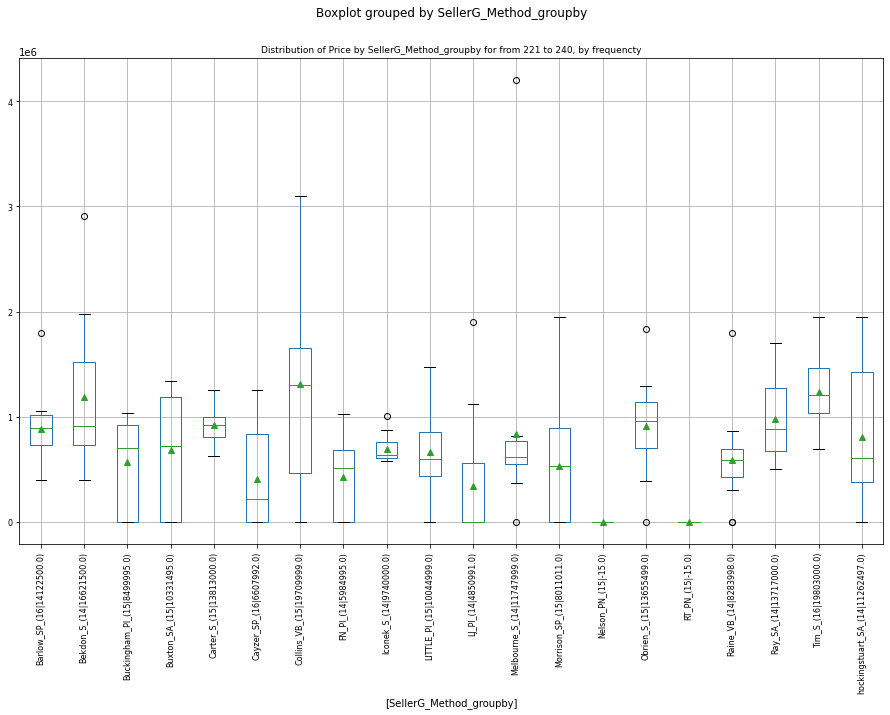

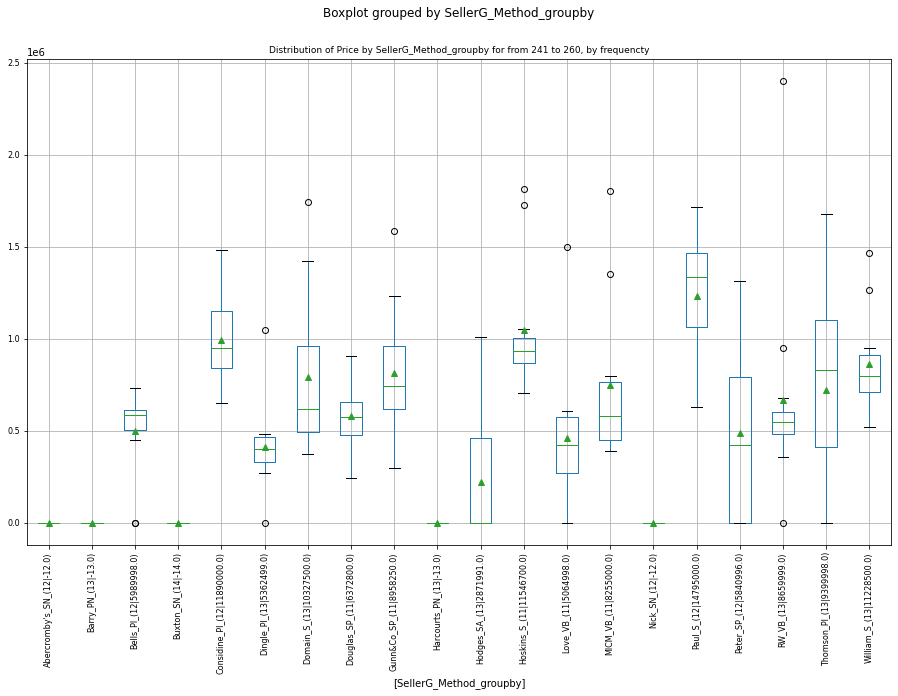

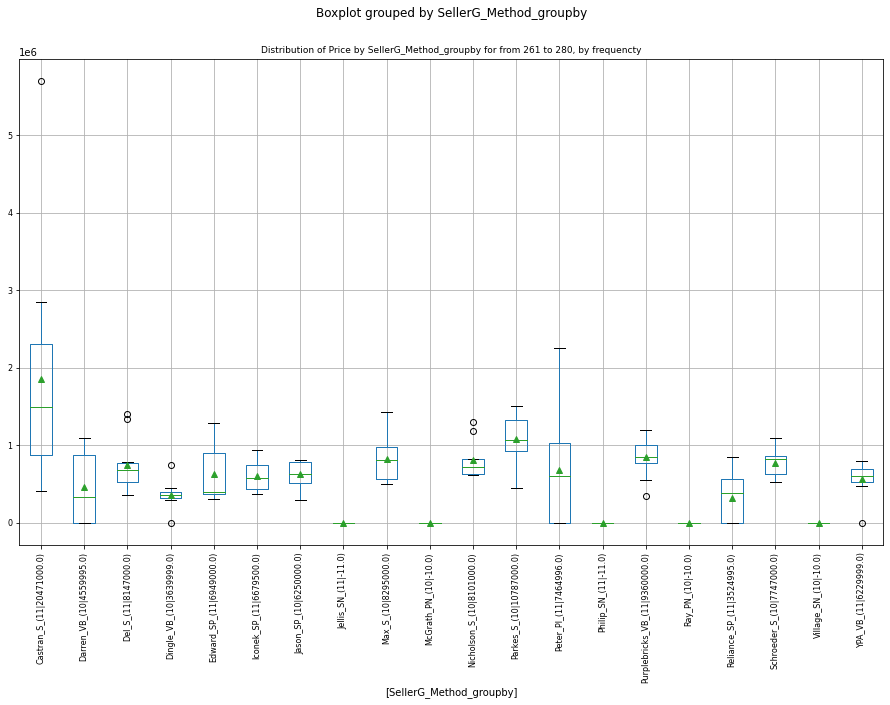

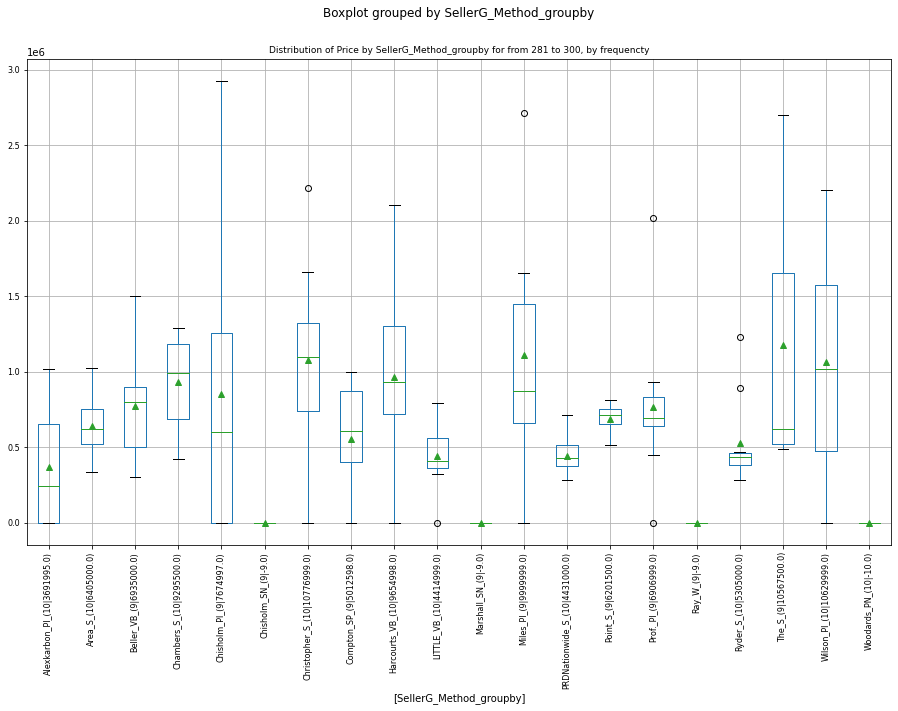

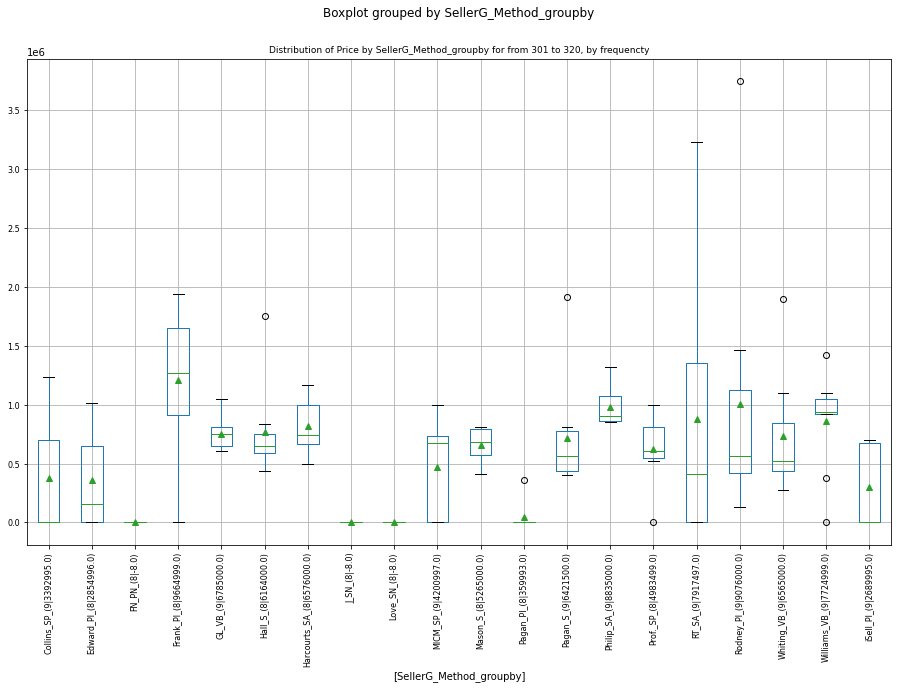

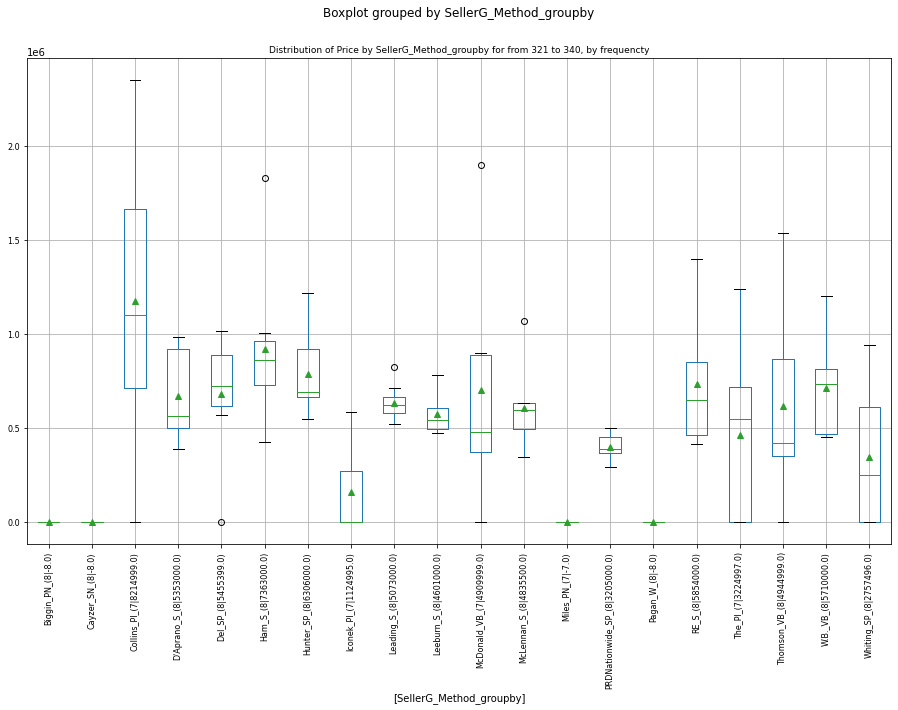

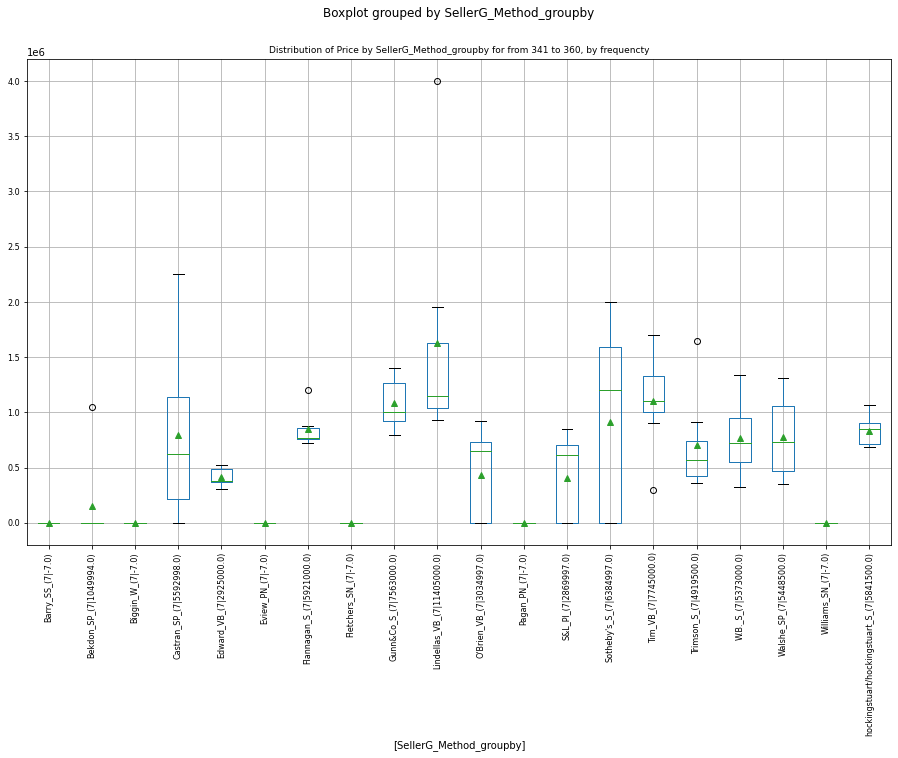

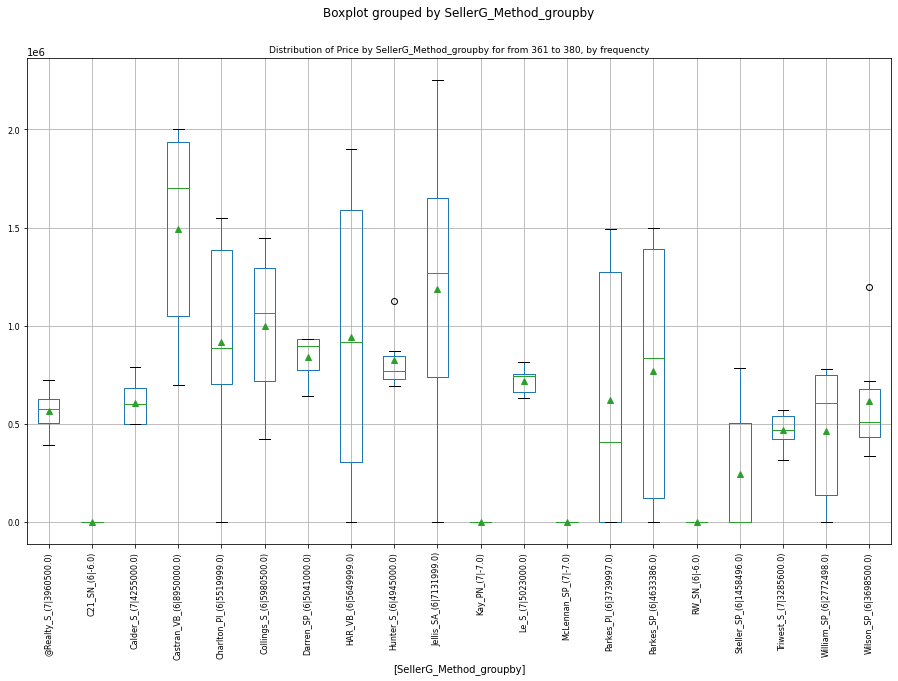

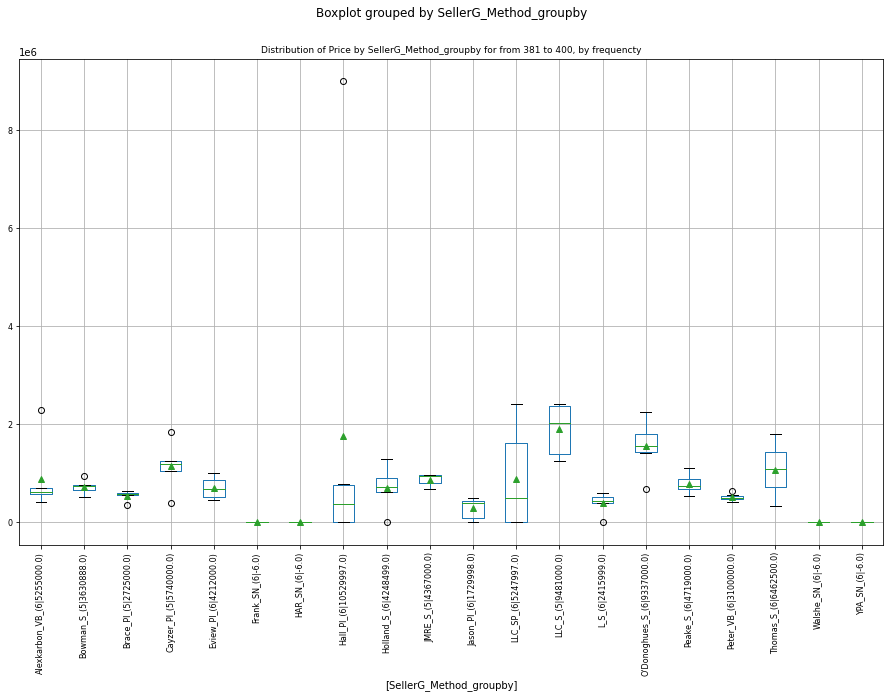

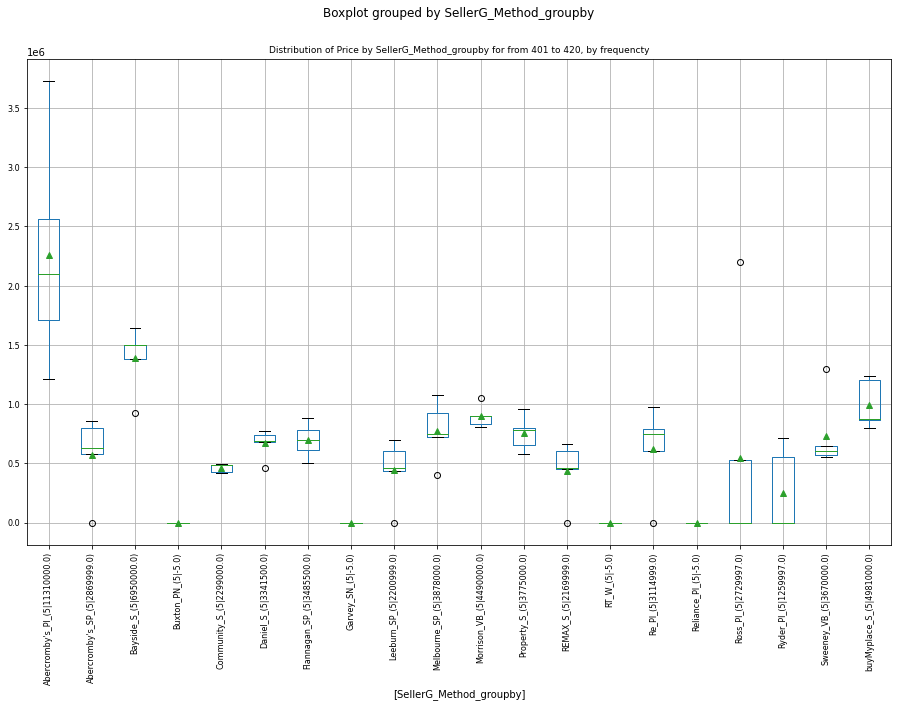

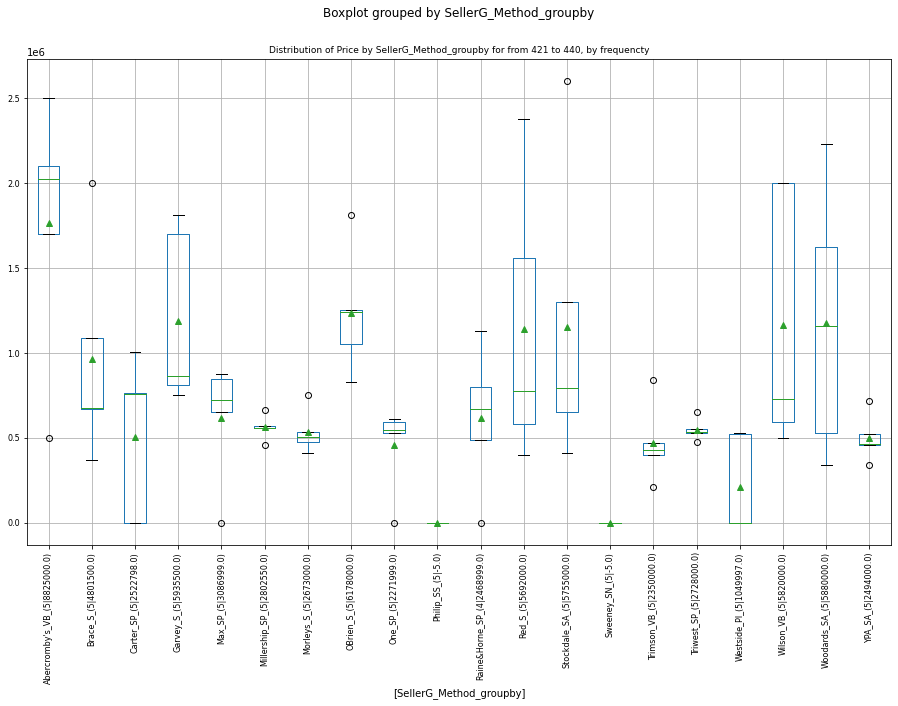

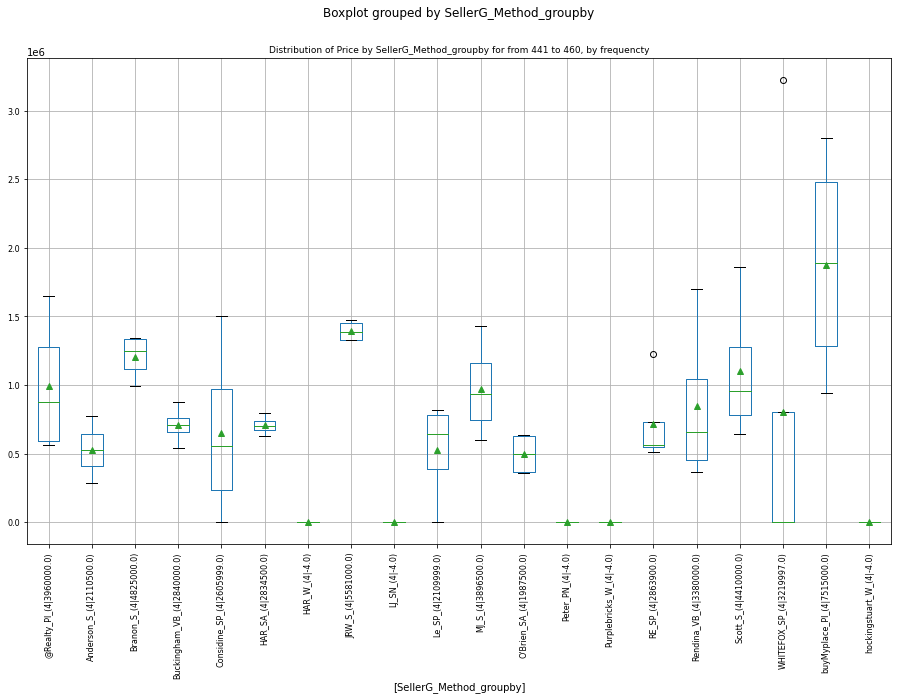

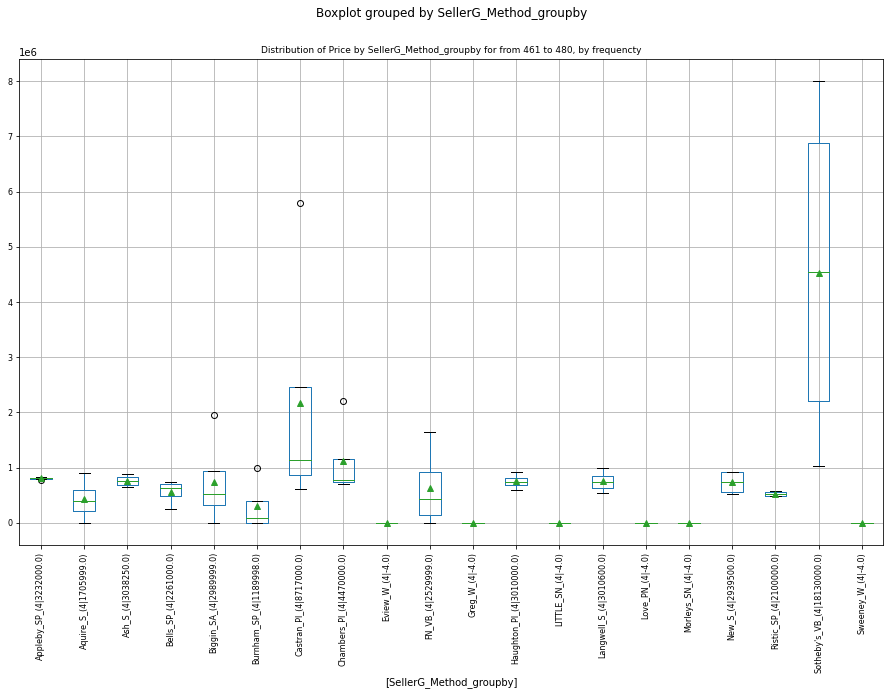

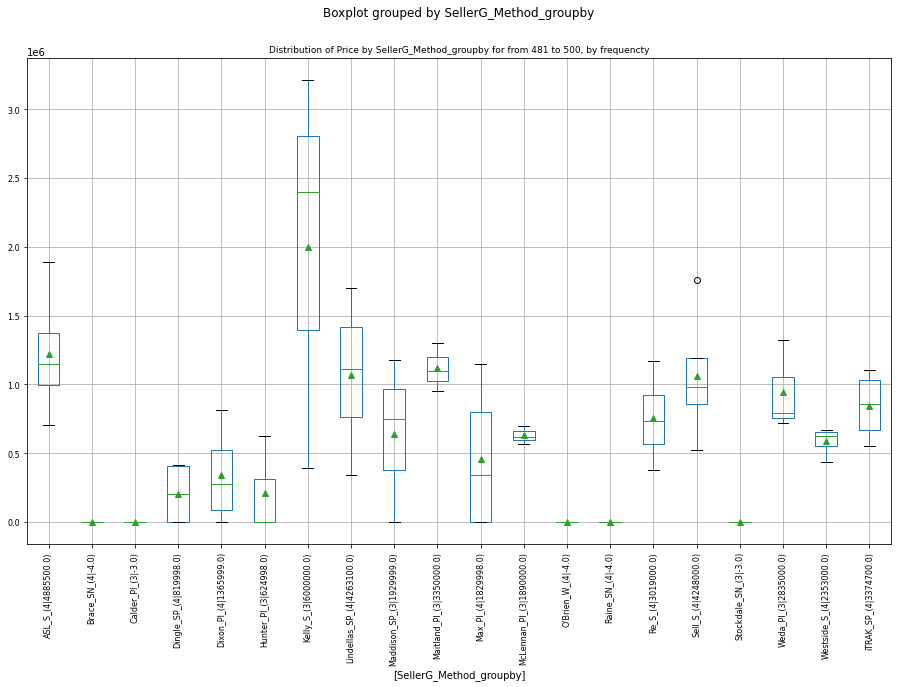

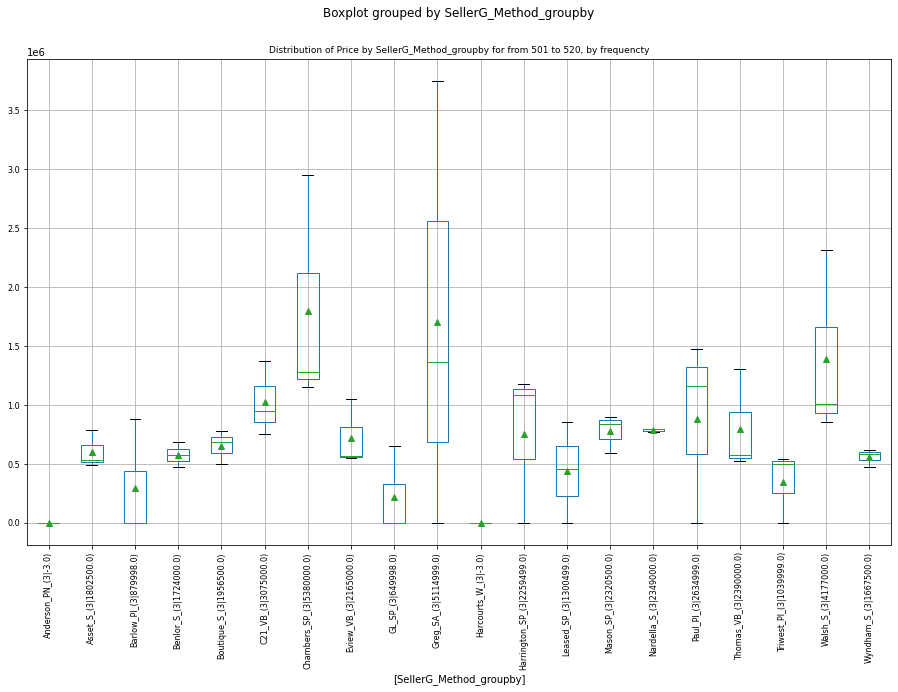

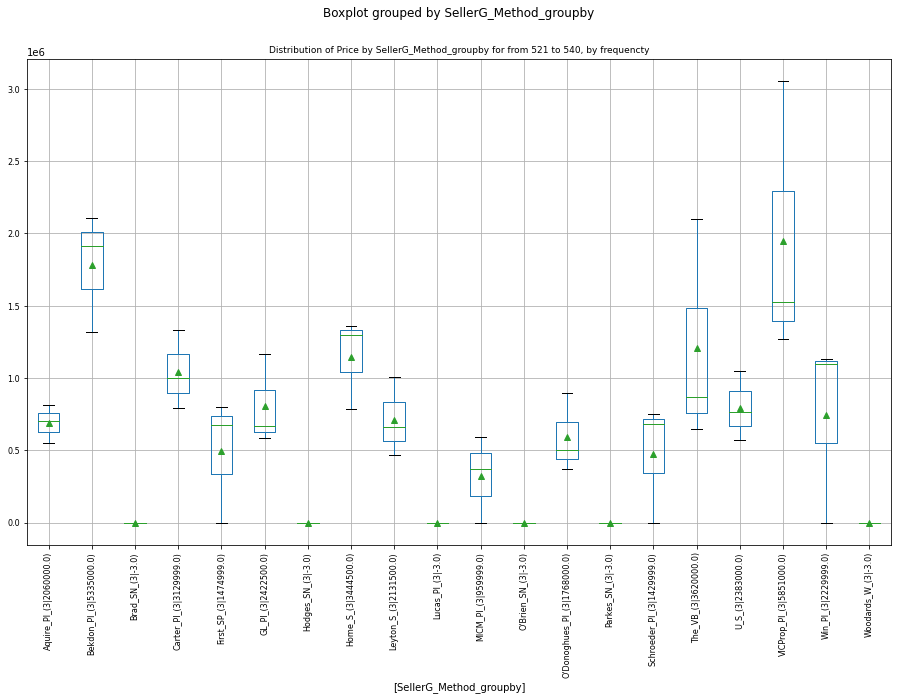

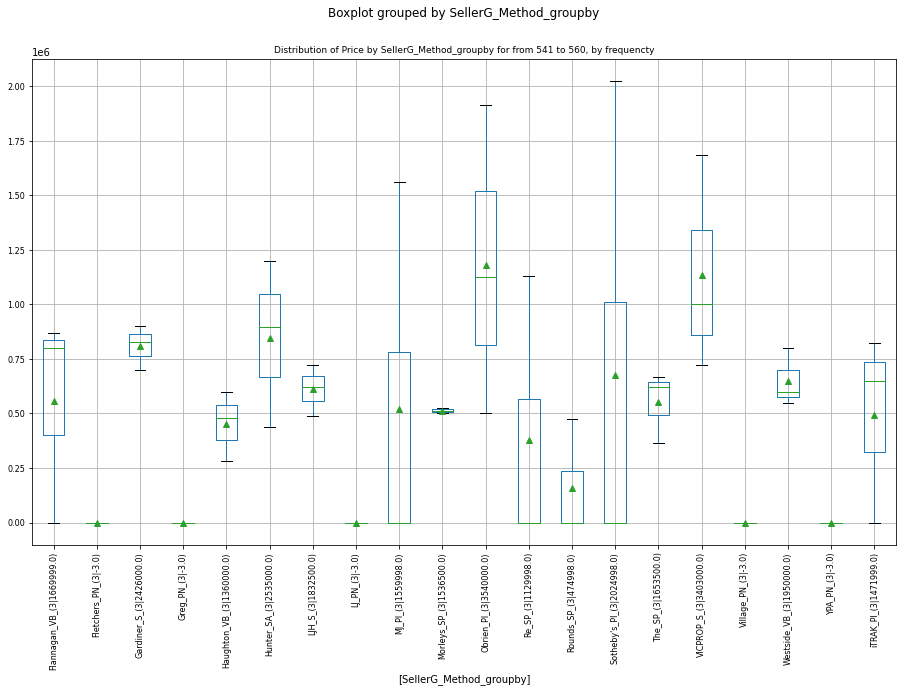

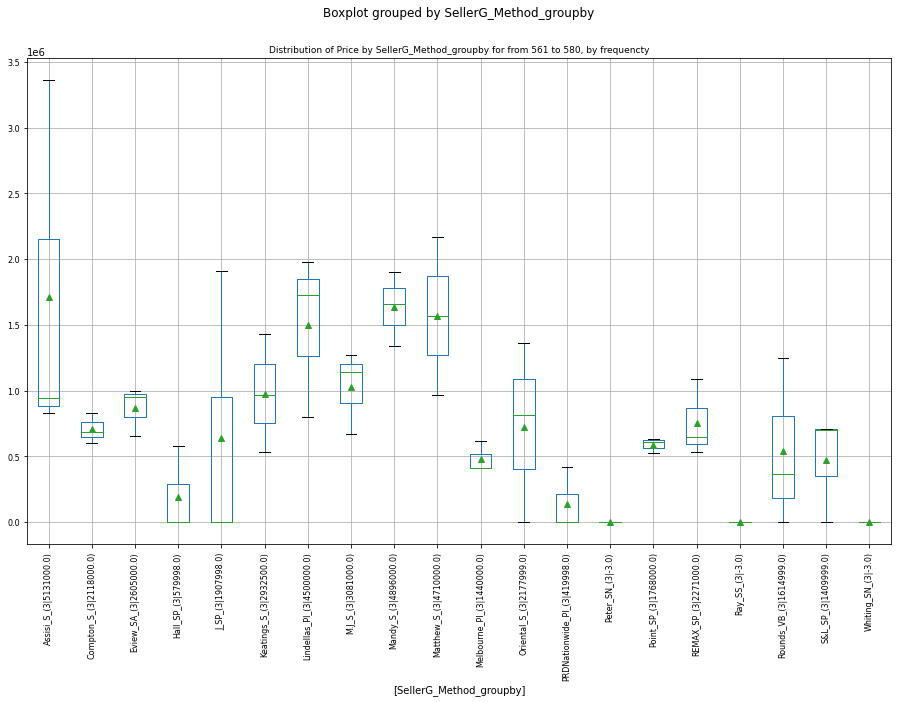

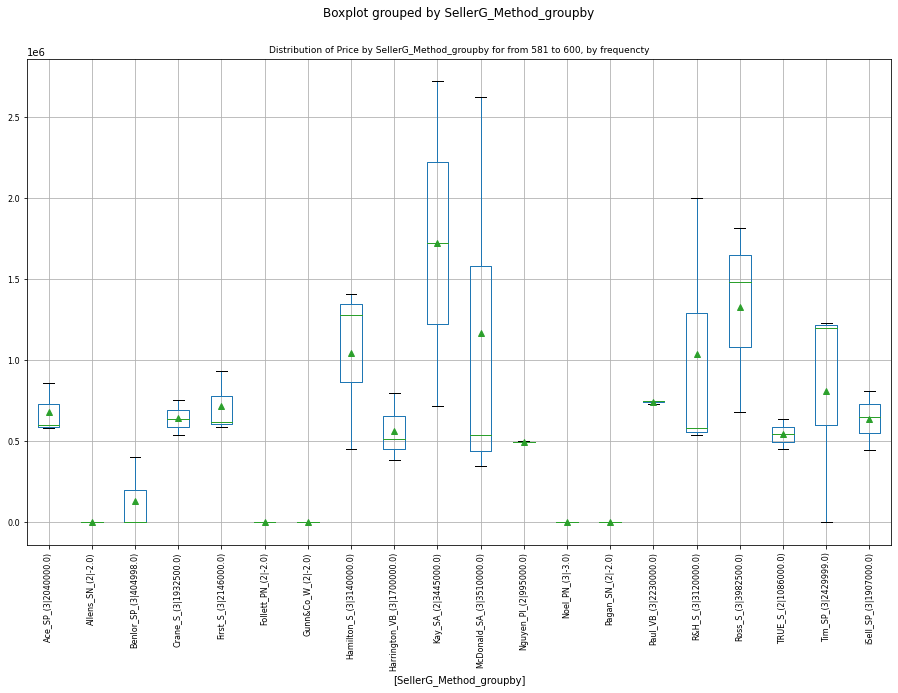

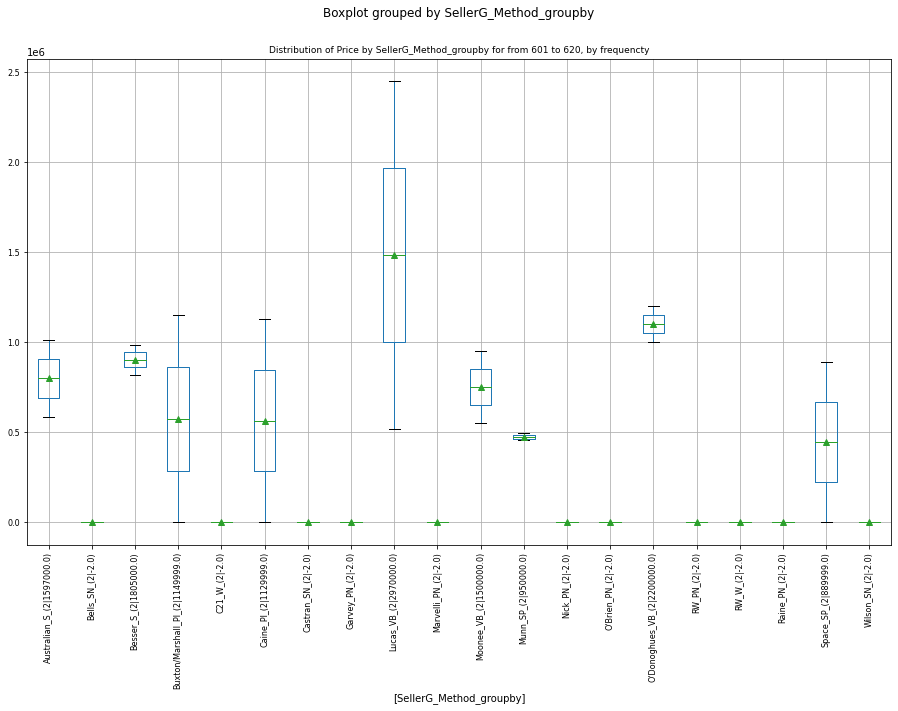

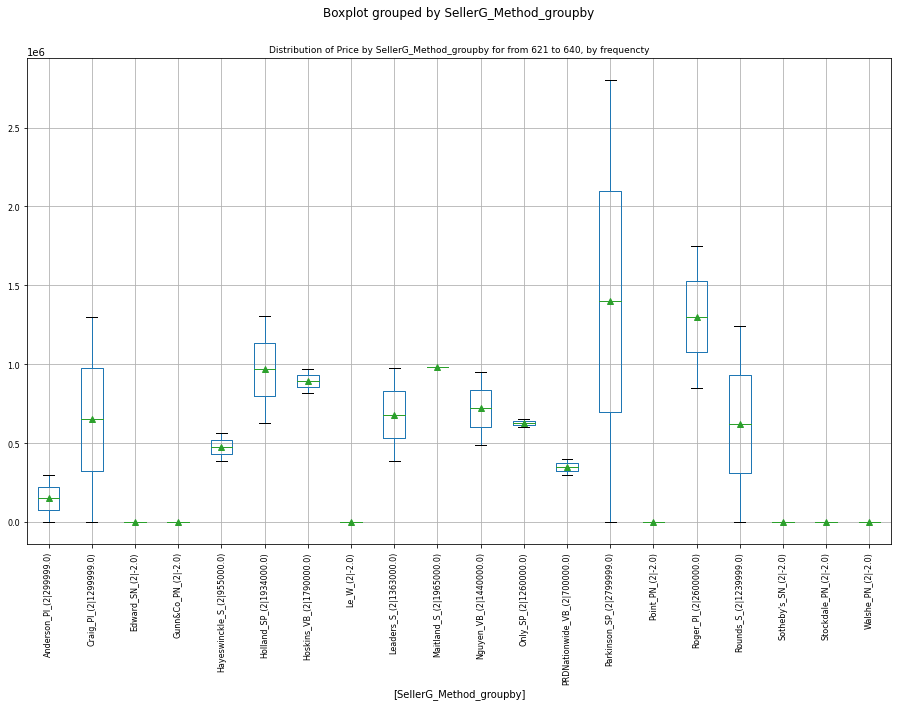

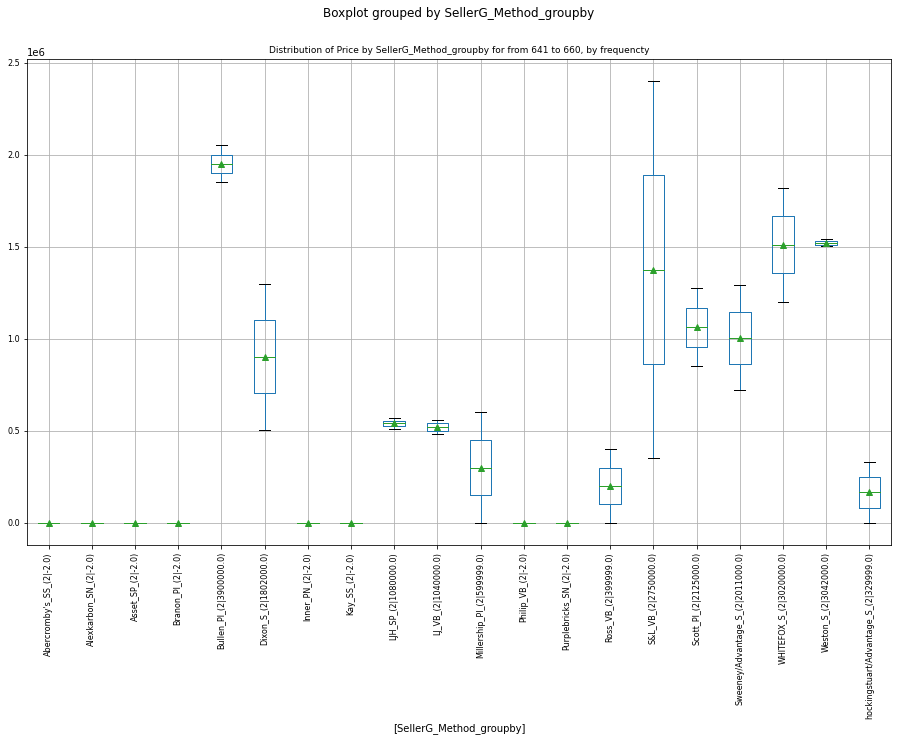

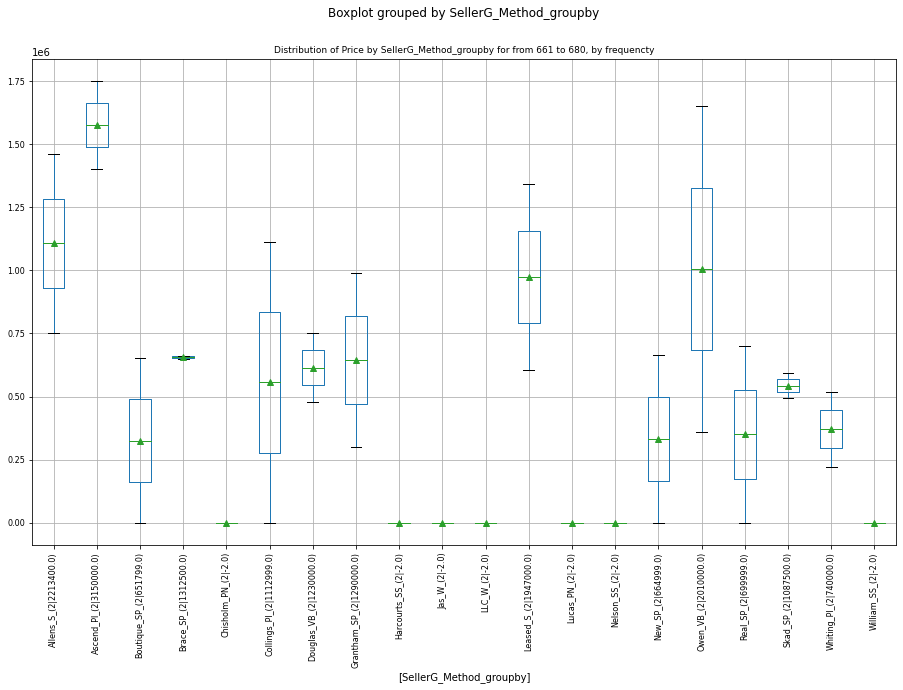

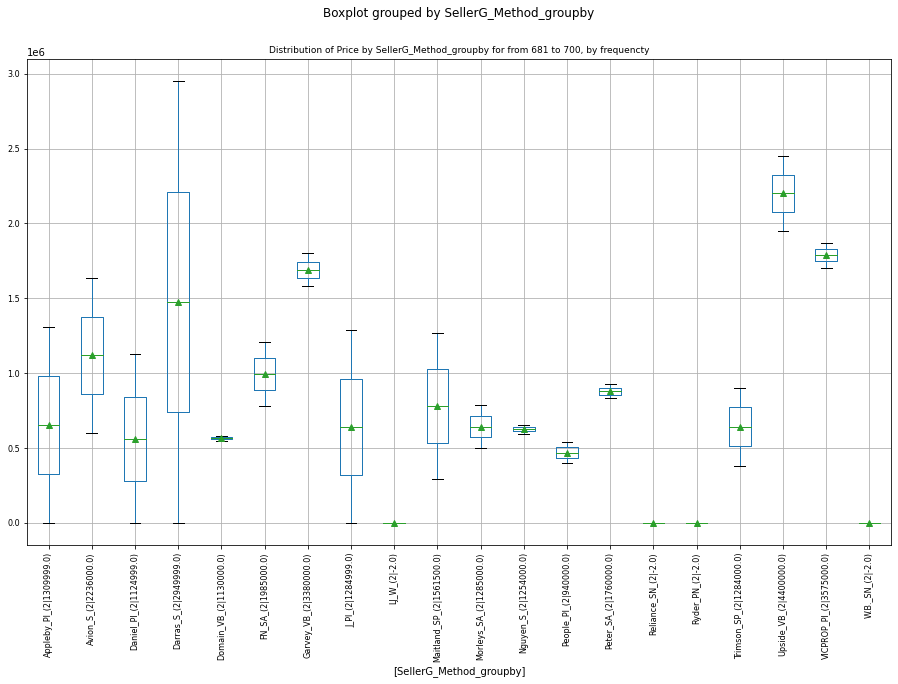

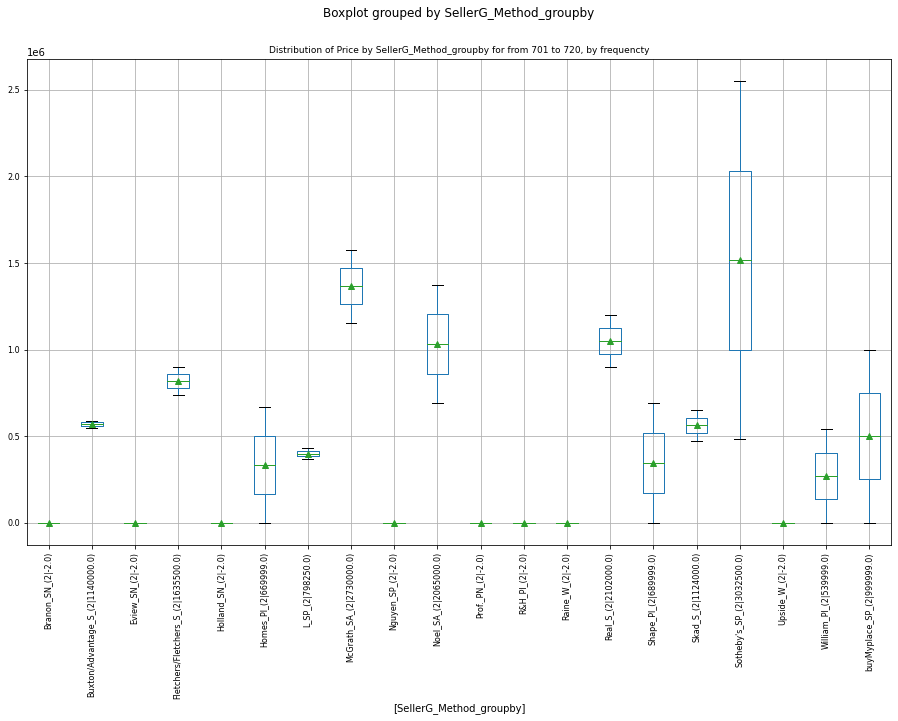

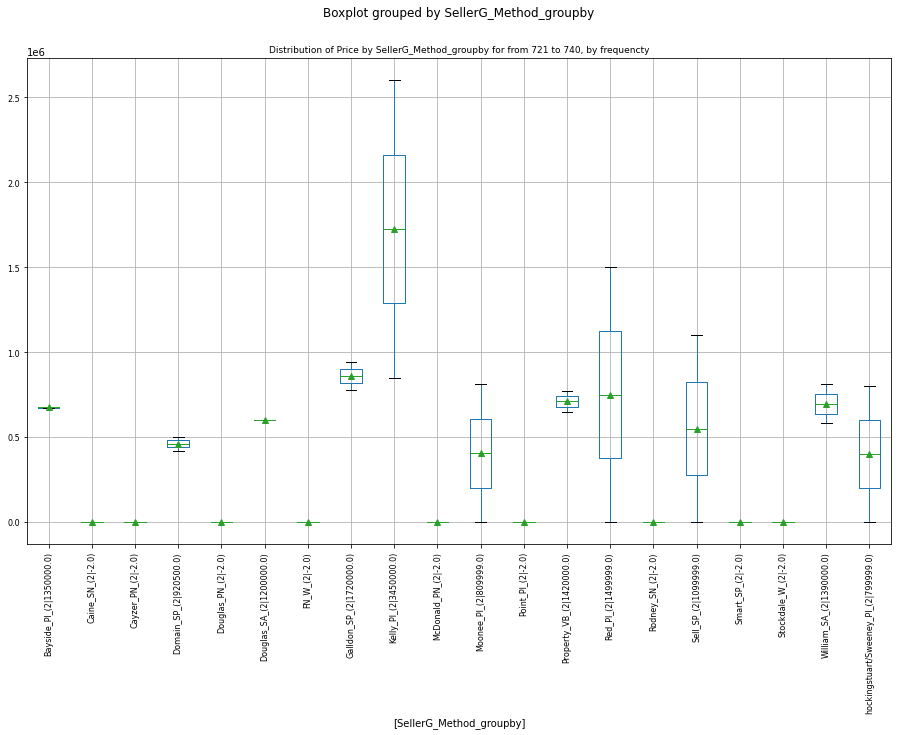

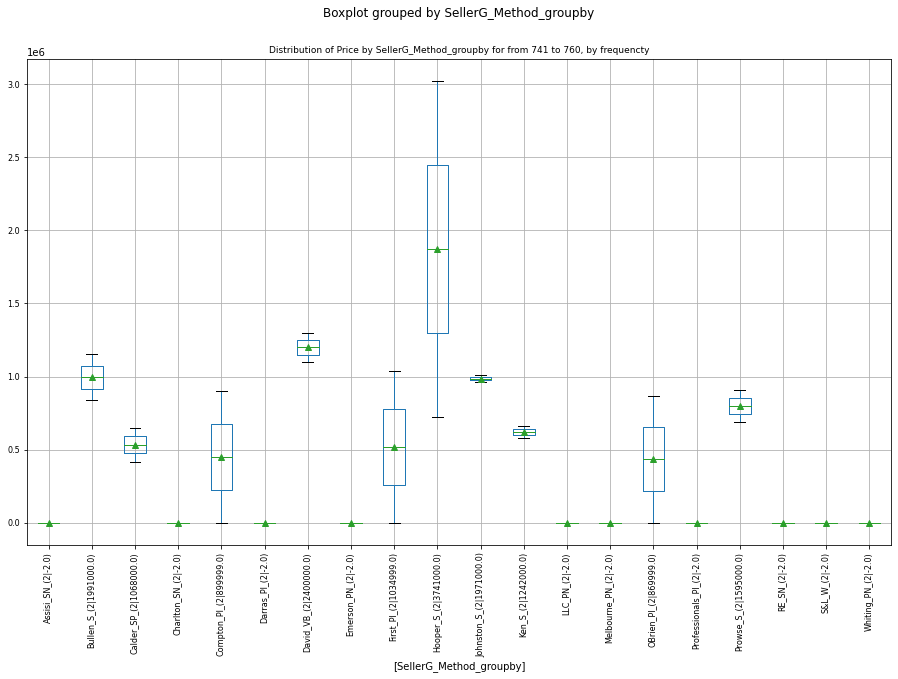

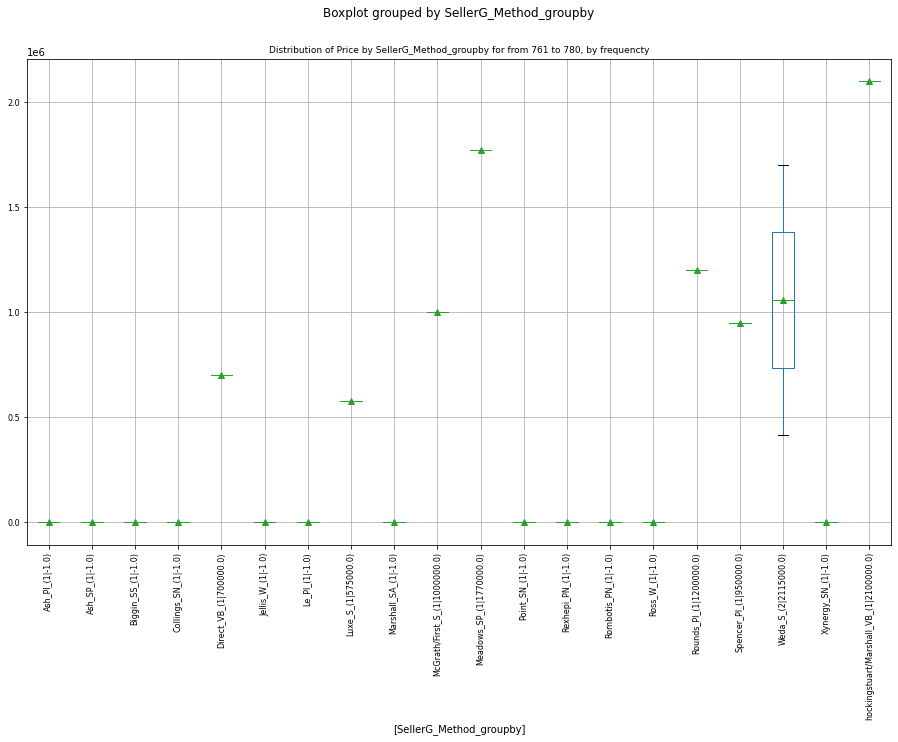

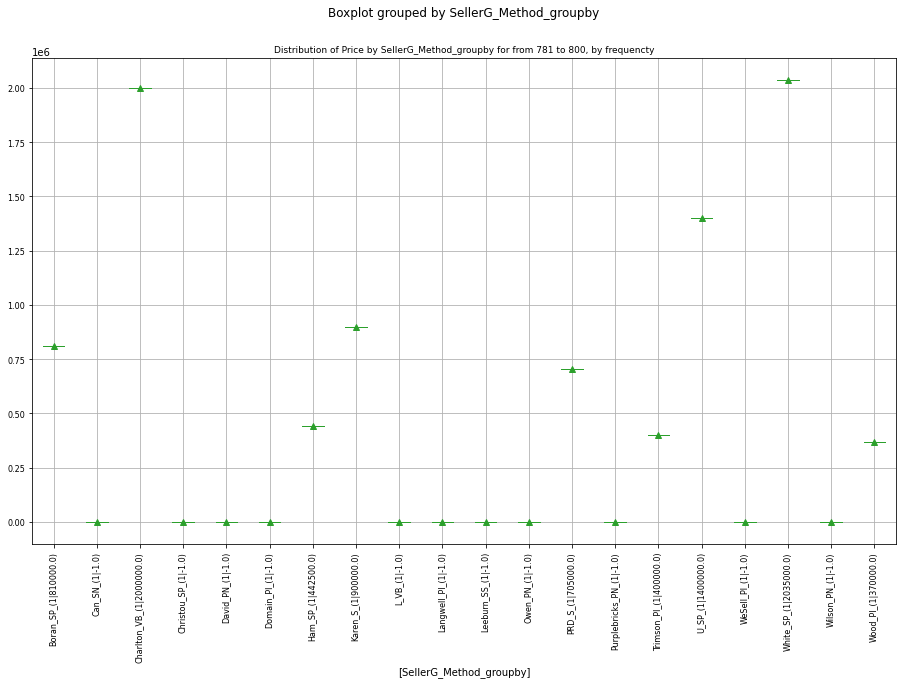

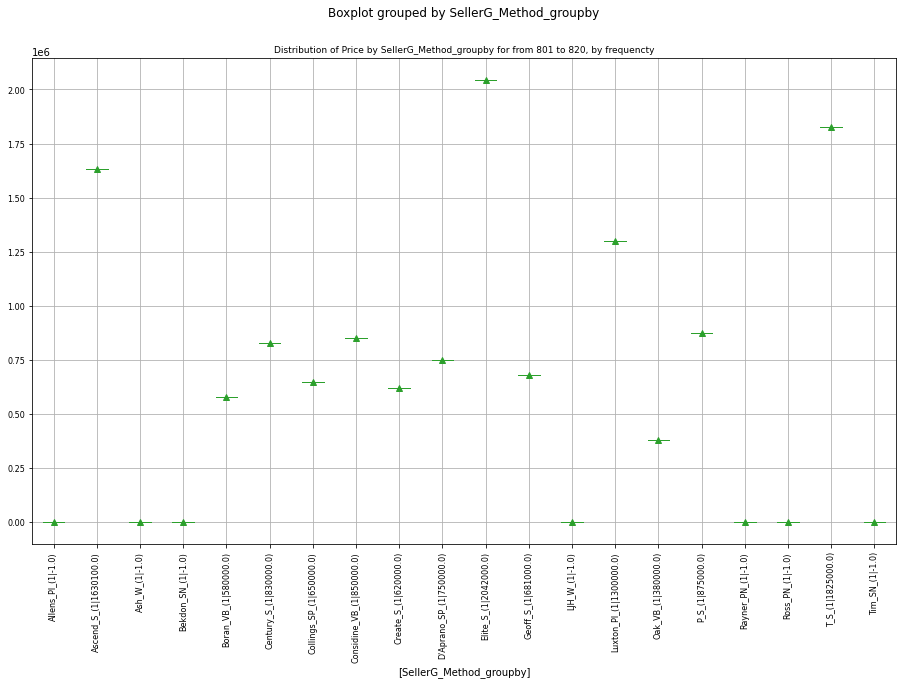

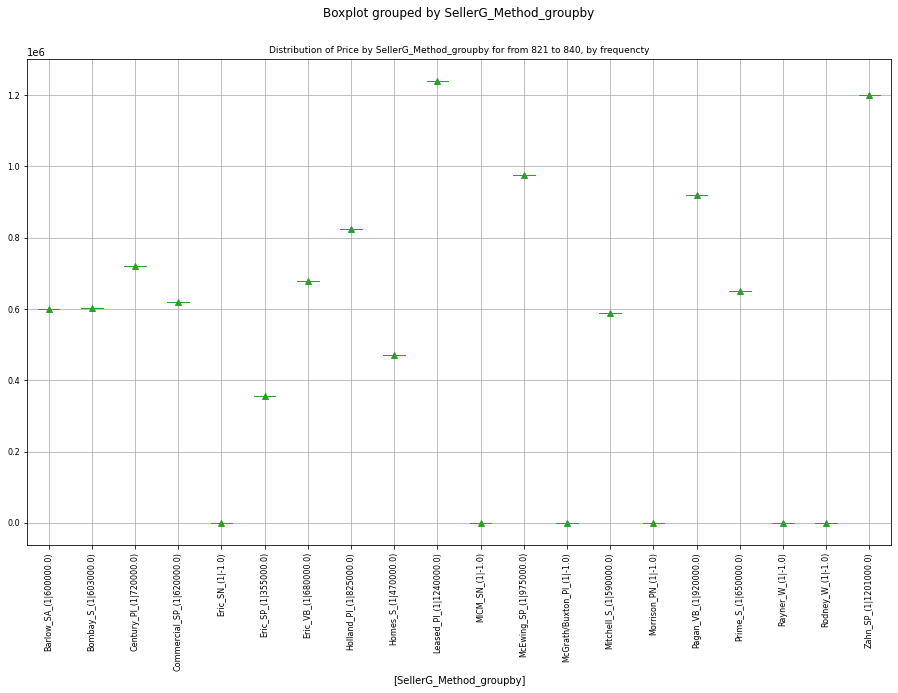

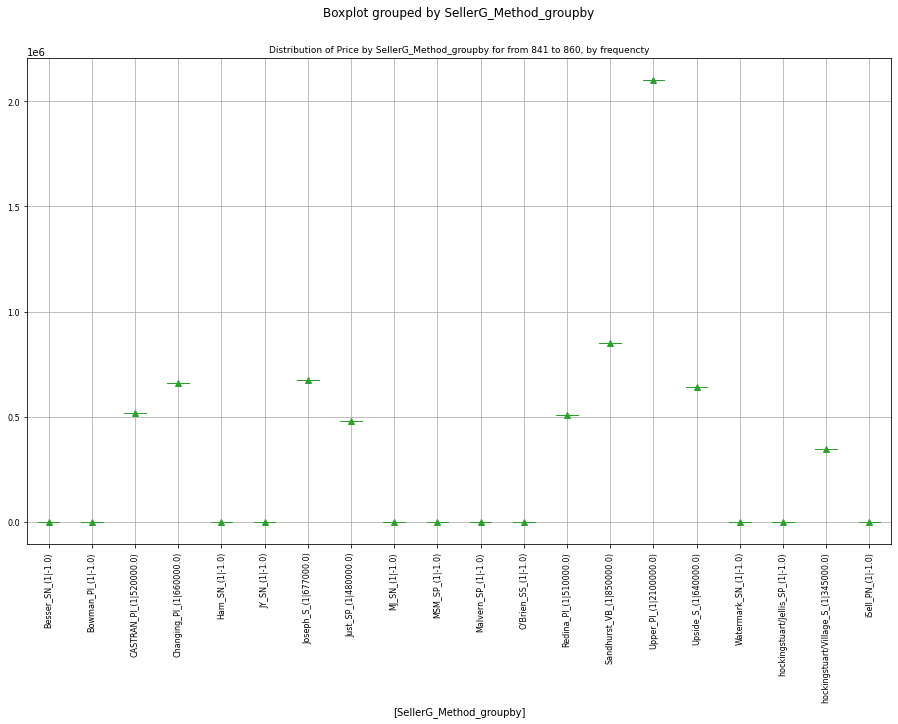

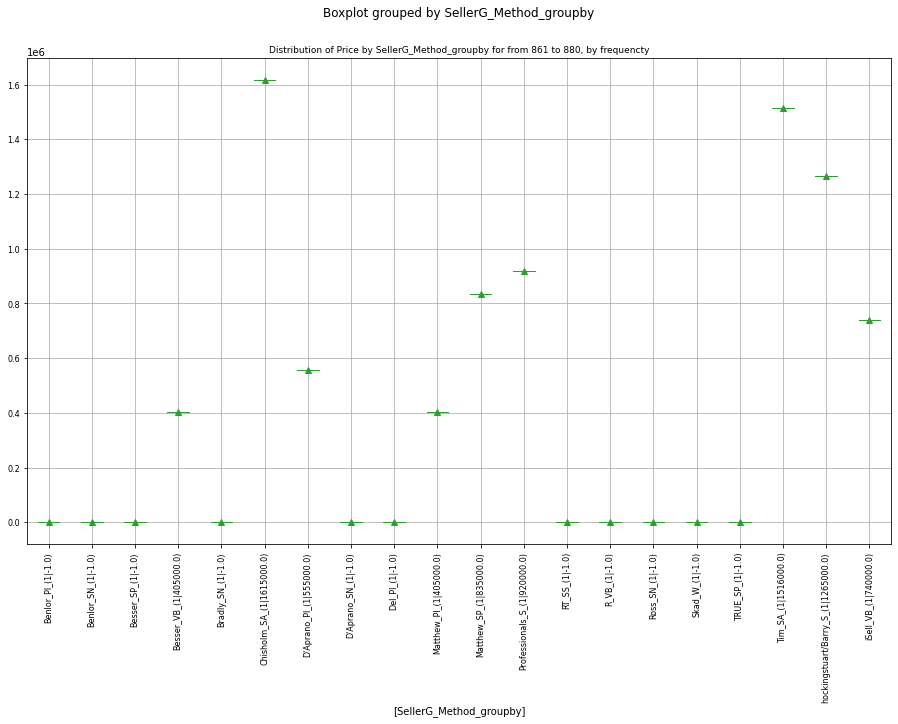

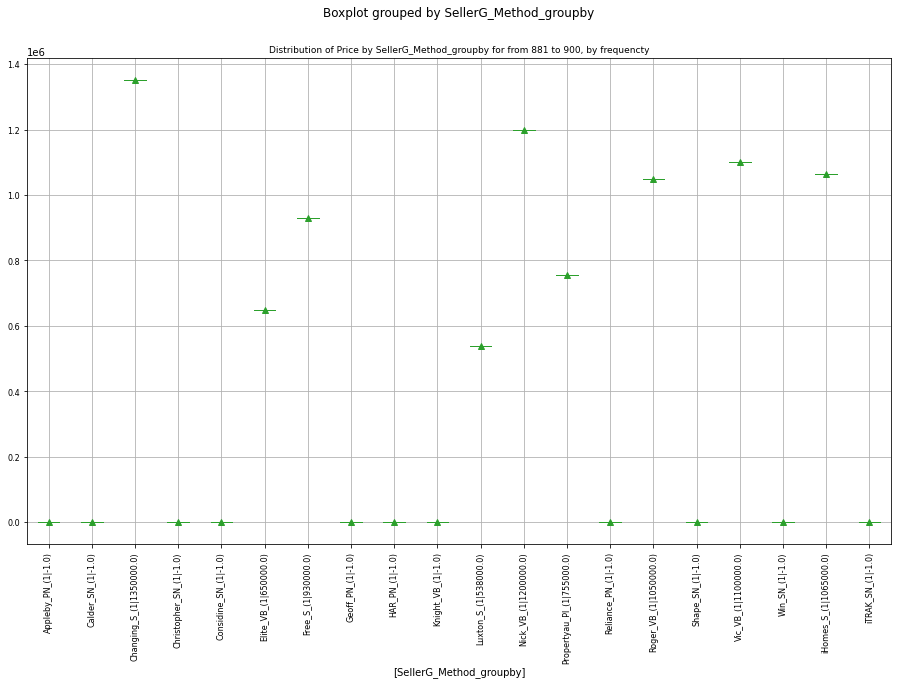

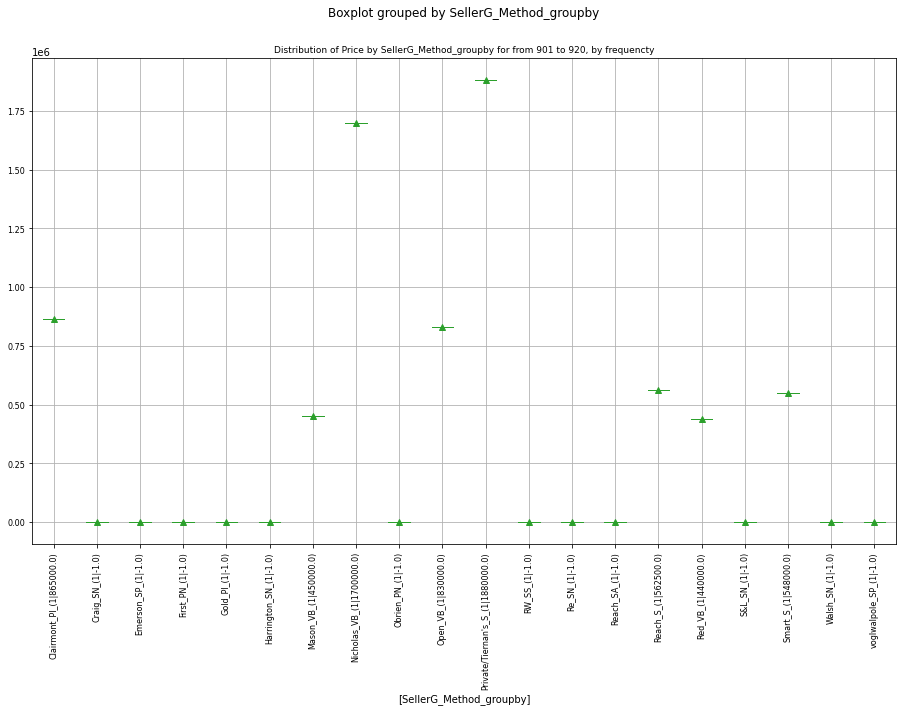

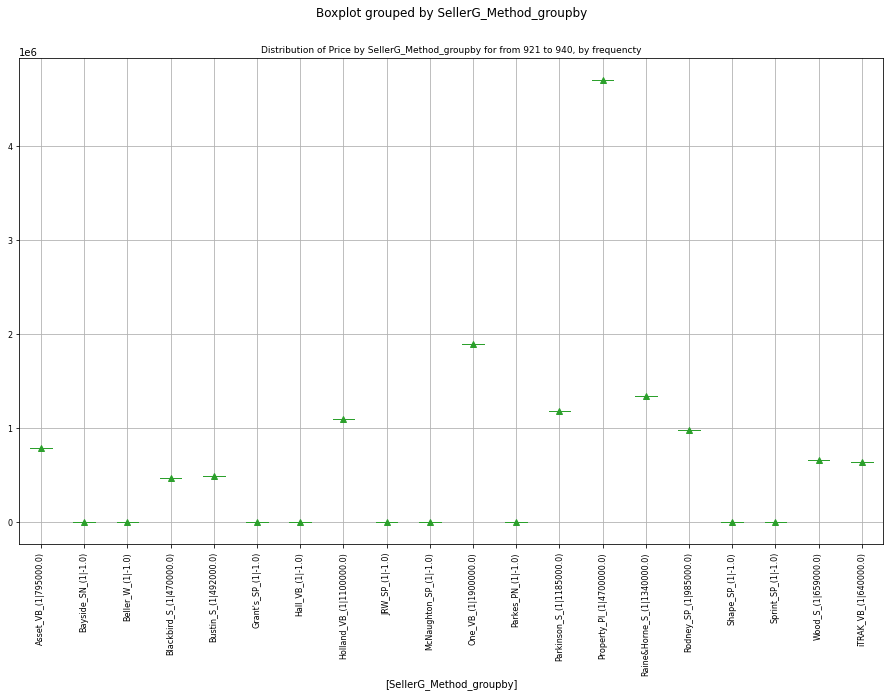

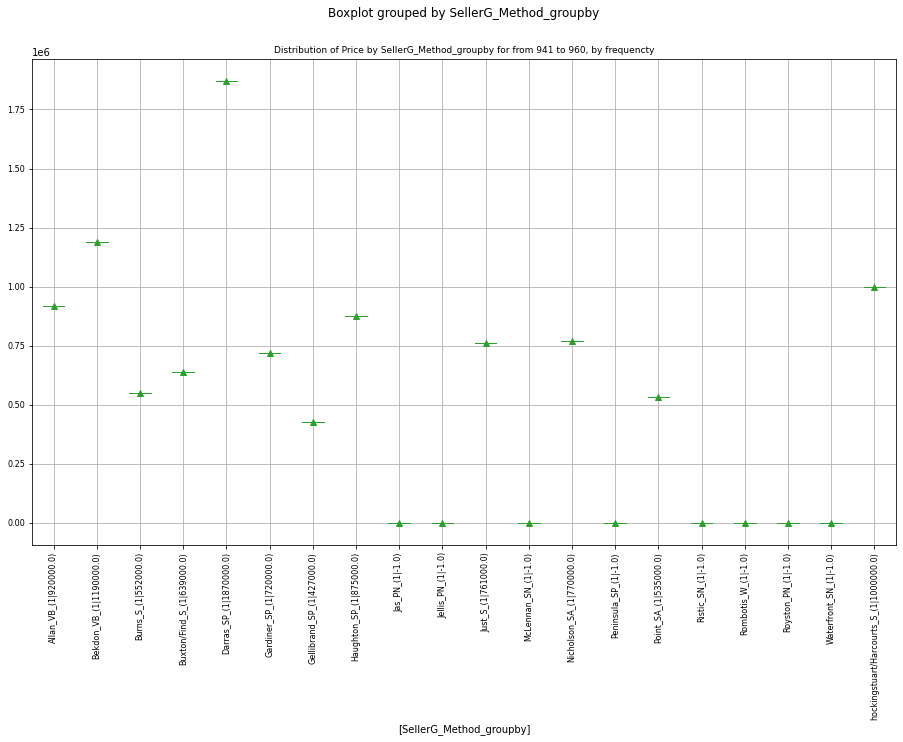

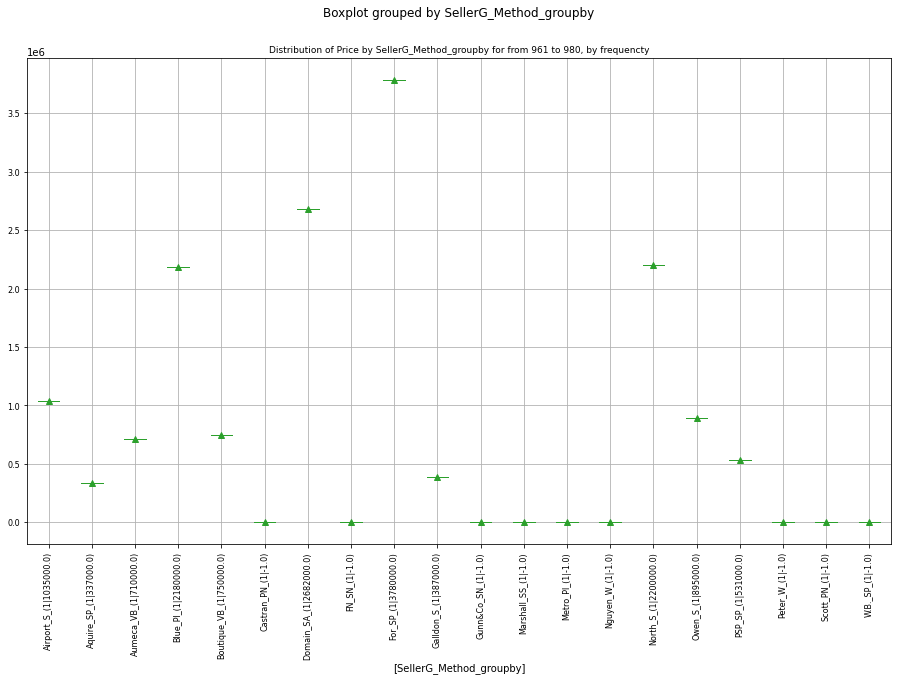

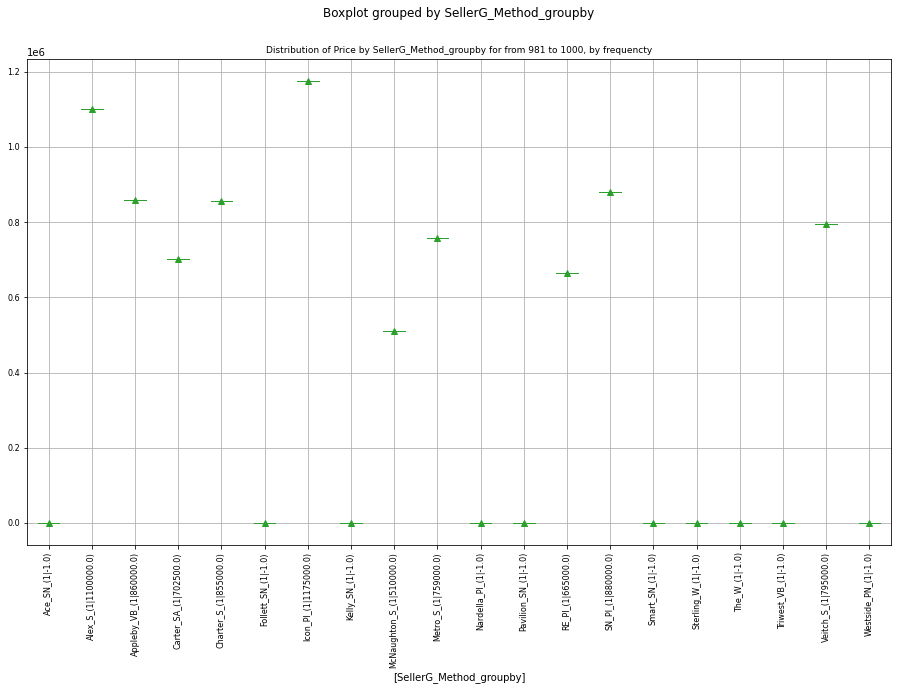

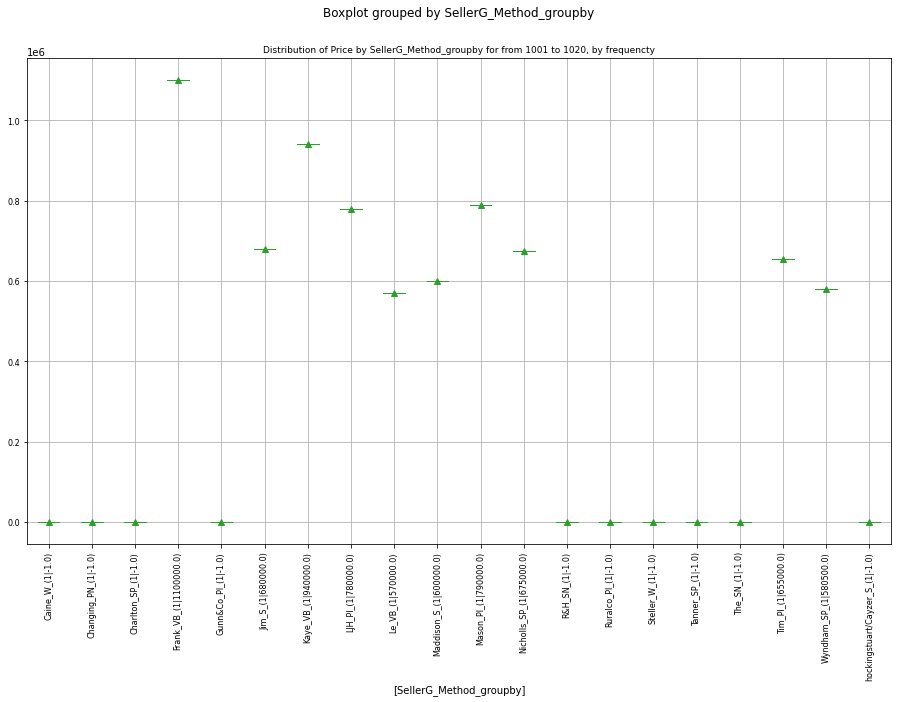

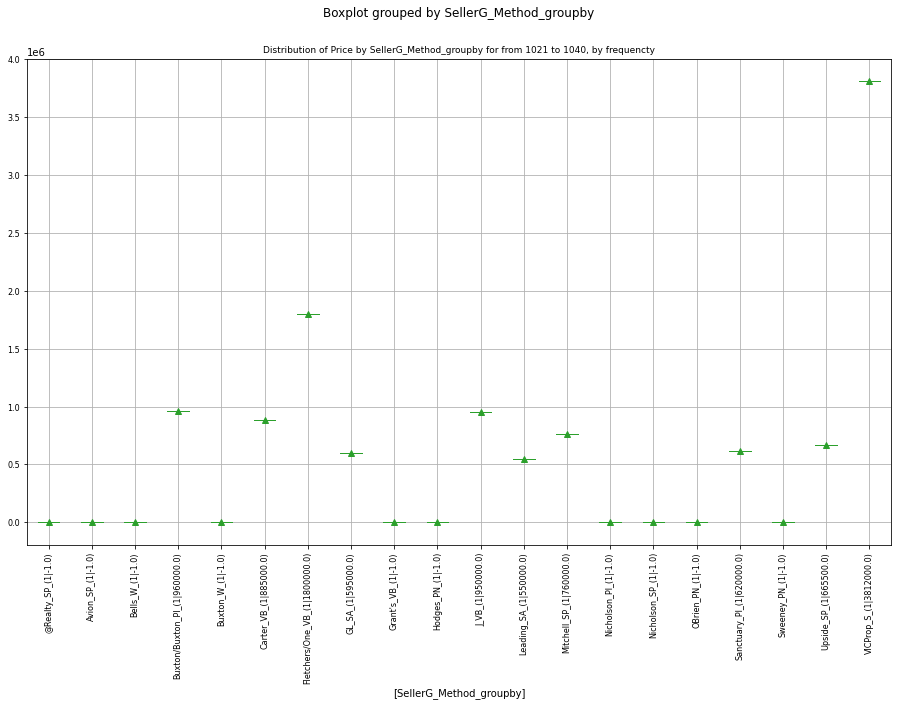

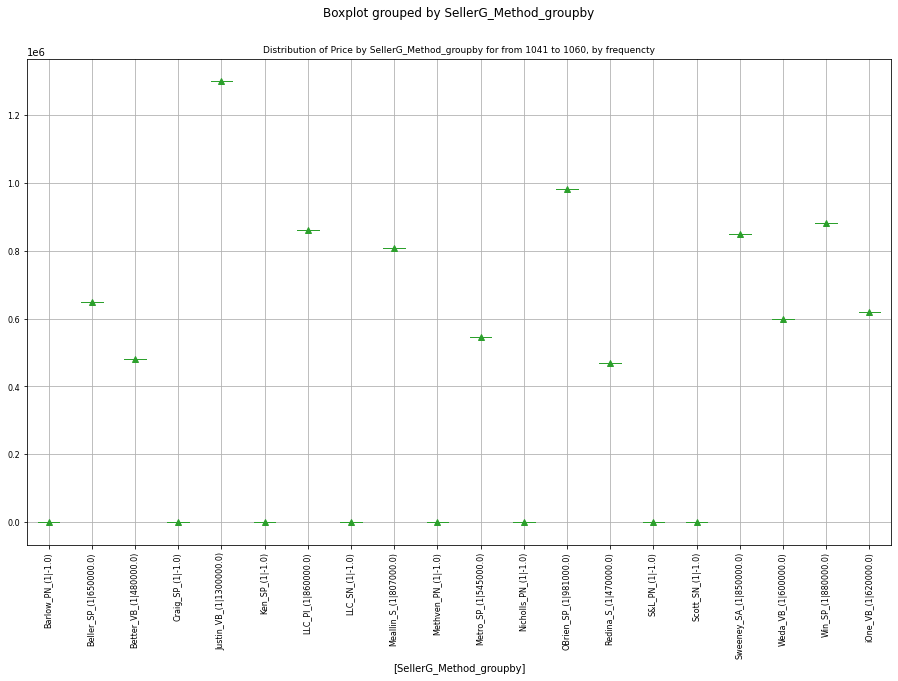

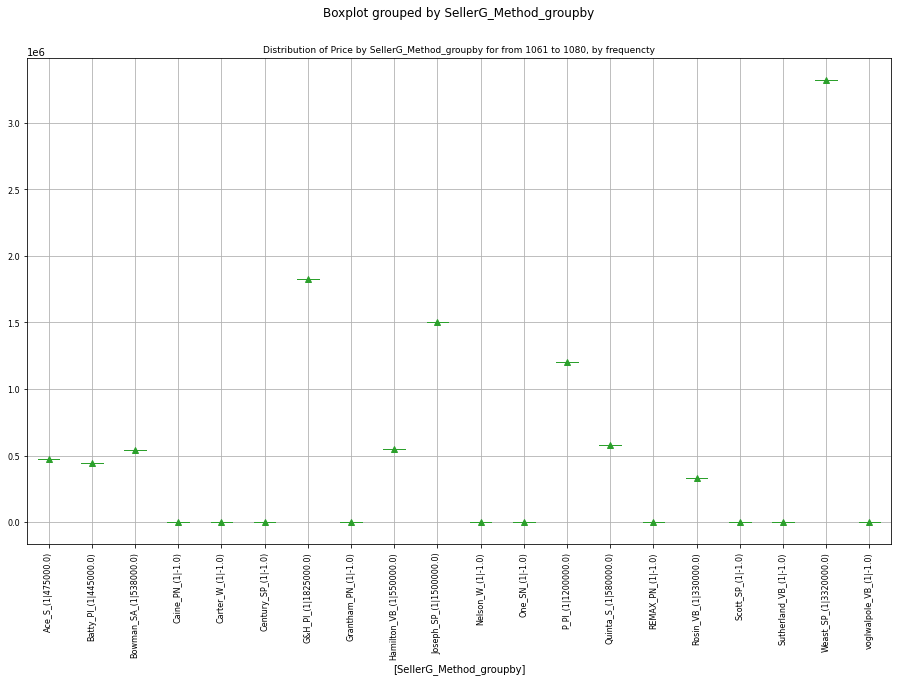

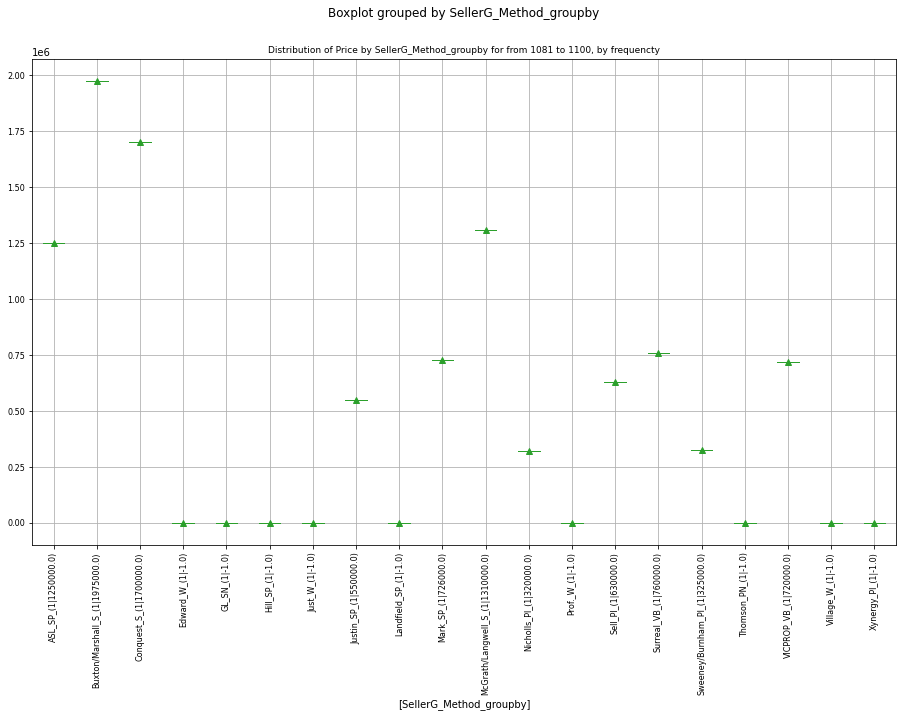

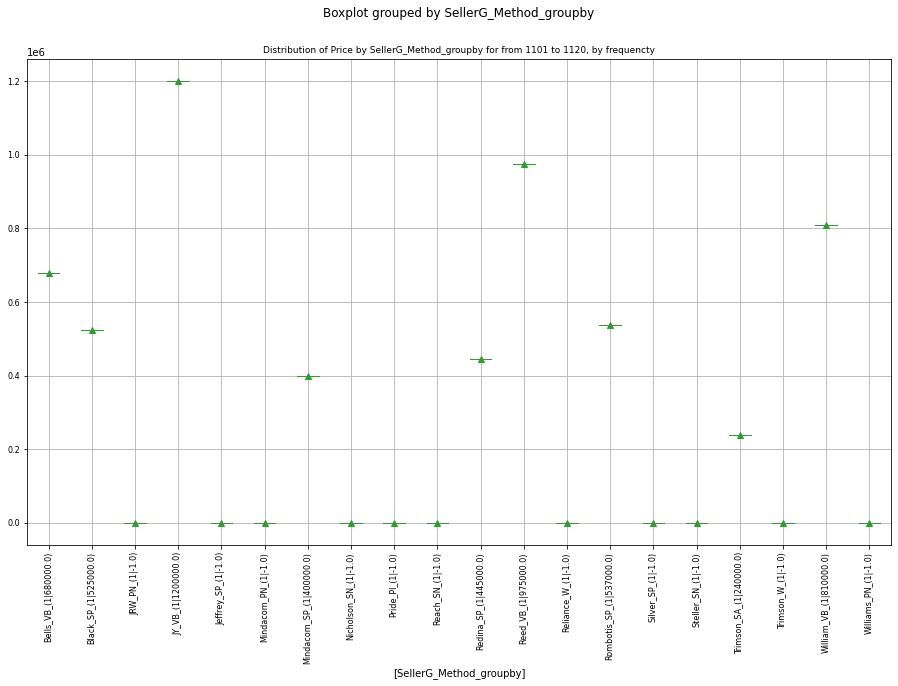

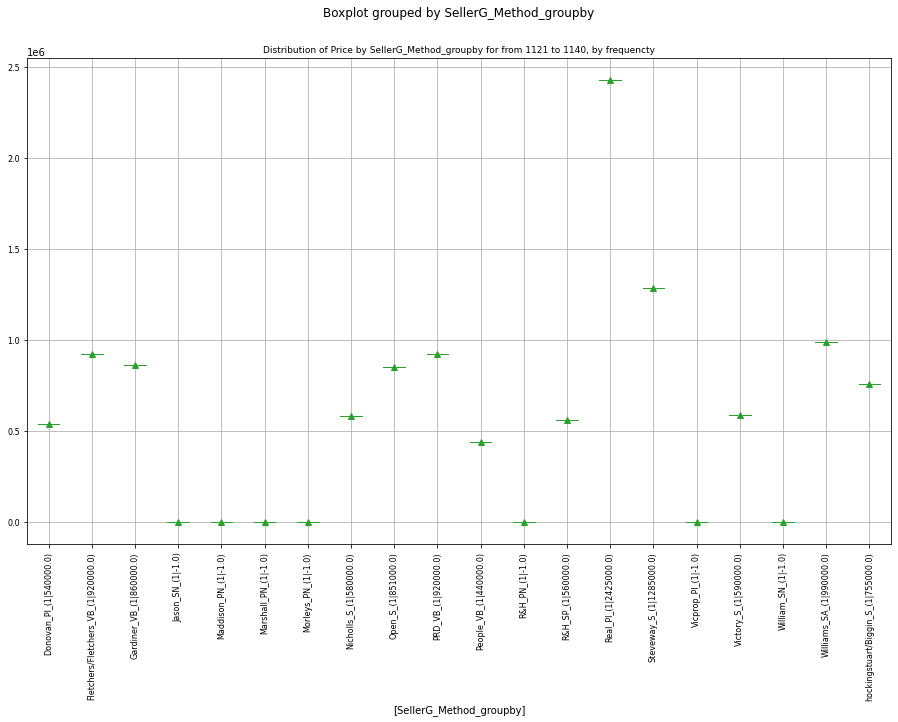

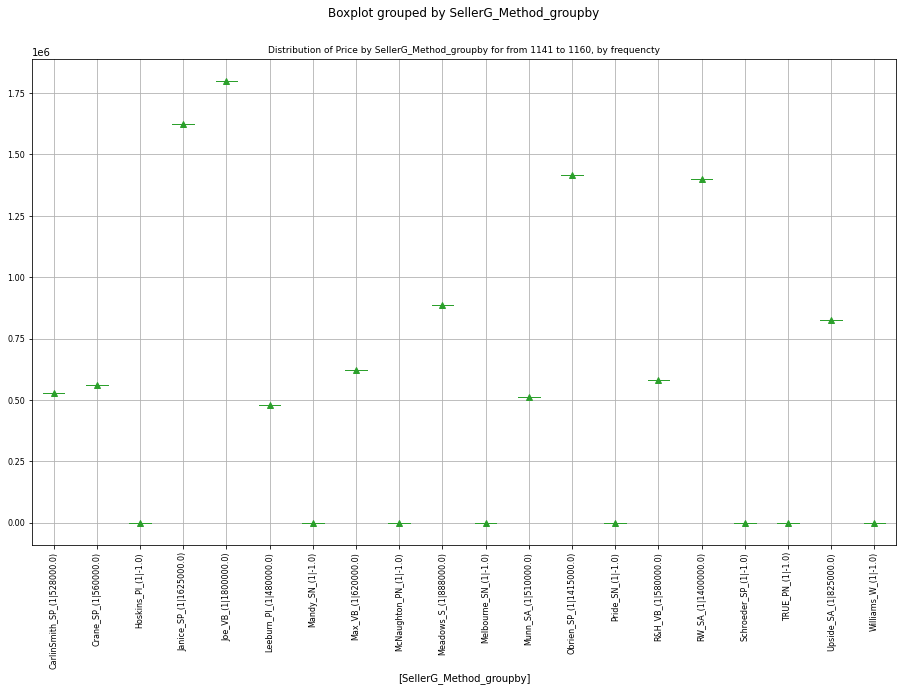

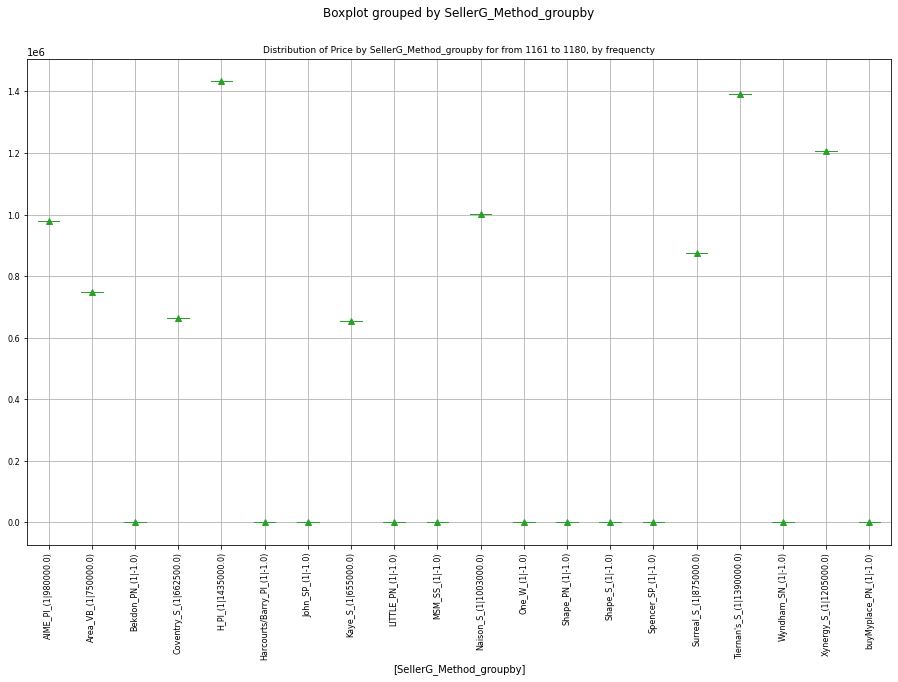

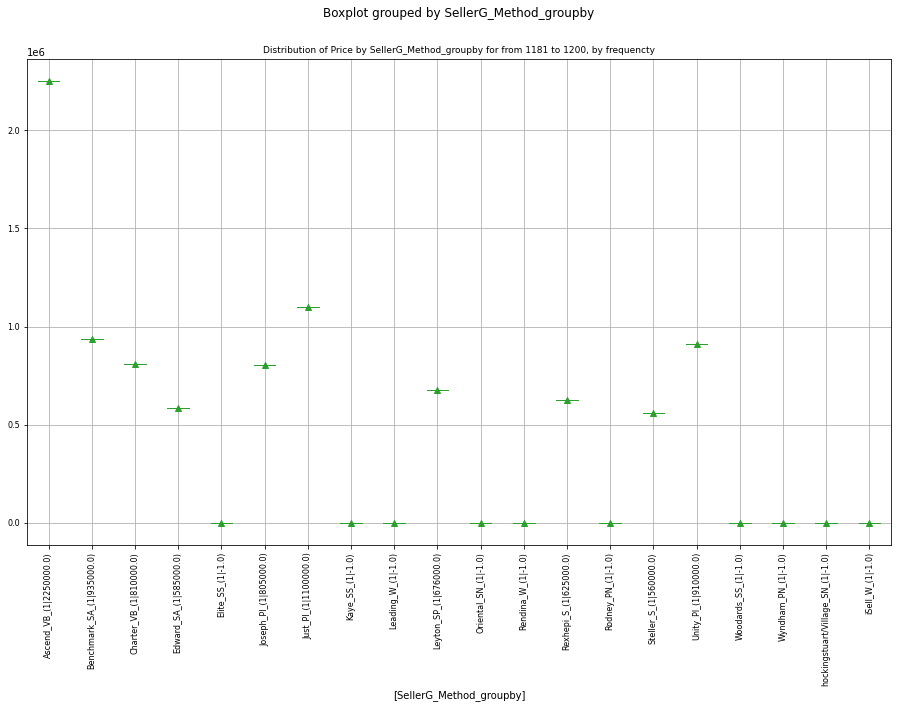

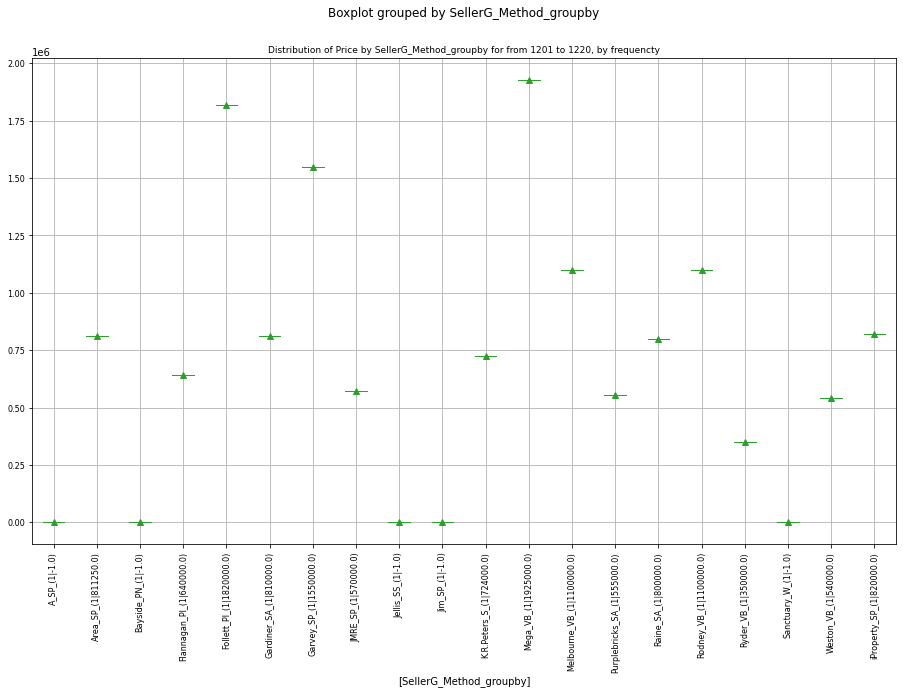

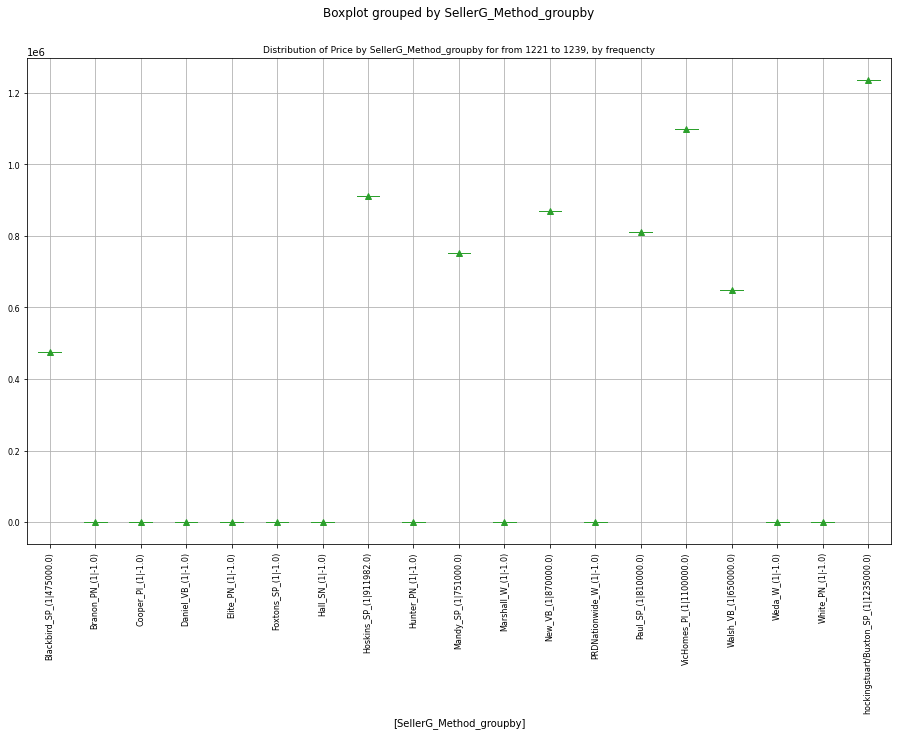

In [36]:
allFigs = []
for k in sellerG_Method_val_counts_groups.keys():
    filterList = sellerG_Method_val_counts_groups.get(k)
    startIndex = k + 1
    if len(filterList) < groupSize:
        endIndex = k + len(filterList)
    else:
        endIndex = k + groupSize

    valCol = "Price"
    byCol = "SellerG_Method_groupby"
    title = f"Distribution of {valCol} by {byCol} for from {startIndex} to {endIndex}, by frequencty"

    fig = plotAGroup(statsdf_groupby, byCol, valCol, filterList, title)
    allFigs.append(fig)
saveToPDF("Boxplot_Analysis.pdf",allFigs)